# 📂 Labor Force Survery 2024
#### Goal: *Find what factors affect a person's employability*

___

### CSMODEL Major Course Output *Phase 1*

Members:
* AVELINO, Sophia Kylie
* BALINGIT, Andrei Luis
* WONG, Ching Man
* YOUNG, Cedric Francis

___

### Phase 1: data description, target research question, preprocessing, and exploratory data analysis

> Deliverables:
>
> A Jupyter Notebook containing all the data processing you did in the project. The Notebook should include Markdown
cells explaining each process, and highlighting the insights and conclusions. The Notebook should be structured in a
way that (1) is easy to understand, and (2) can be run sequentially to reproduce all outputs in your work.

---

## 📝 Section 1 - Dataset Description

### Section 1.1 - Introduction ###

This project entails exploring the Labor Force Survey (LFS) dataset, which is a nationwide survey of households every quarter that captures demographic and socio-economic information in regards to the current Labor Force of the Philippines. The primary purpose of the LFS is to obtain an estimate of employment and unemployment rates in the labor market and offer a quantitative framework for the formulation of labor market policies. The information encompasses a comprehensive range of individual and household characteristics for all the socio-economic factors.

The database, obtained from the Philippine Statistics Authority (PSA), contains records of a national sample of about 44,063 households (Batanes included) per round of surveys. It contains detailed data for each person in the households surveyed, namely demographic traits (age, sex, marital status), educational level, occupation, and work status. The reporting unit is the household, which in turn means that the statistics present the traits of people living in private households only and not those in institutions.

### Section 1.2 - Problem Statement 

The specific task we aim to address is a classification problem. In this notebook, we seek to predict whether an individual has worked in the past week(PUFC11_WORK) which is answered by a binary yes or no input, using the features provided in the LFS dataset. The target variable, PUFC11_WORK, is a binary variable indicating whether an individual has worked in the past week (Yes/No). This is a binary classification problem, where we aim to classify individuals into two groups: those who have worked and those who have not, based on their demographic and socio-economic characteristics. Thus, the goal of our models is to predict which of the two groups is a person a part of based on demographic variables, educational attainment, occupation, and household characteristics features provided by the LFS dataset. Namely, these feature columns are described as the following:

Included in the dataset is an Excel file titled 'lfs_march_2024_metadata(dictionary).xlsx' which contains a dictionary and a value set of the dataset. We have used the two in order to further understand and explore both the descriptions and categorical values of each feature provided. 

Considering this, we have categorized the features as below:

#### 1. Demographic Variables

* `PUFC04_SEX` → C04 - Sex
* `PUFC05_AGE` → C05 - Age as of Last Birthday
* `PUFC06_MSTAT` → C06 - Marital Status
* `PUFC03_REL` → C03 - Relationship to Household Head


#### 2. Household Characteristics

* `PUFREG` → Region
* `PUFHHNUM` → Household Unique Sequential Number
* `PUFHHSIZE` → Household Size
* `PUFC01_LNO` → Line Number (individual in household)


#### 3. Educational Attainment

* `PUFC07_GRADE` → C07 - Highest Grade Completed


#### 4. Migration & Overseas Work

* `PUFC08_CONWR` → C08 - Overseas Filipino Indicator


#### 5. Employment Status & Labor Force Participation

* `PUFC09_WORK` → C09 - Work Indicator
* `PUFC09A_WORK` → C09A - Work Arrangement
* `PUFC10_JOB` → C10 - Job Indicator
* `PUFC11A_PROVMUN` → C11 - Location of Work (Province, Municipality)
* `PUFC13_PROCC` → C13 - Major Occupation Group
* `PUFC15_PKB` → C15 - Major Industry Group
* `PUFC16_NATEM` → C16 - Nature of Employment
* `PUFC17_PNWHRS` → C17 - Normal Working Hours per Day
* `PUFC18_PHOURS` → C18 - Total Number of Hours Worked during the Past Week
* `PUFC19_PWMORE` → C19 - Wants More Hours of Work
* `PUFC20_PLADDW` → C20 - Looks for Additional Work
* `PUFC20B_FTWORK` → C20B - First Time Doing Any Work
* `PUFC21_PCLASS` → C21 - Class of Worker
* `PUFC22_OJOB` → C22 - Other Job Indicator
* `PUFC23_THOURS` → C23 - Total Hours Worked (All Jobs)
* `PUFC24_WWM48H` → C24 - Reason for Working >48 Hours
* `PUFC25_LOOKW` → C25 - Looked for Work or Tried to Start a Business
* `PUFC25B_FTWORK` → C25B - First Time Looking for Work
* `PUFC26_WYNOT` → C26 - Reason for Not Looking for Work
* `PUFC27_AVAIL` → C27 - Availability for Work
* `PUFC28_PREVJOB` → C28 - Previous Job Indicator
* `PUFC29_YEAR` → C29 - Last Worked (Year)
* `PUFC29_MONTH` → C29 - Last Worked (Month)
* `PUFC31_POCC` → C31 - Previous Occupation
* `PUFC33_QKB` → C33 - Kind of Business (Past Quarter)
* `PUFNEWEMPSTAT` → New Employment Criteria (Jul 2005)


#### 6. Survey Design & Weighting

* `PUFPWGTPRV` → Final Weight Based on Projection
* `PUFSVYMO` → Survey Month
* `PUFSVYYR` → Survey Year
* `PUFPSU` → PSU Number
* `PUFRPL` → Replicate

# TODO: 

The variables in this Notebook are as follows:

- `genhlth` - A categorical vector indicating general health, with categories `excellent`, `very good`, `good`, `fair`, and `poor`.
- `smoke100` - A categorical vector, 1 if the respondent has smoked at least 100 cigarettes in their entire life and 0 otherwise.
- `exerany` - A categorical vector, 1 if the respondent exercised in the past month and 0 otherwise.

### Section 1.3 - Libraries needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

# autoreload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Section 1.4 - Importing LFS PUF March 2024.CSV

In [2]:
try:
    lfs_data = pd.read_csv("src/data/PHL-PSA-LFS-2024-03-PUF/LFS PUF March 2024.CSV")
except FileNotFoundError:
    print("Error: CSV file not found. Please make sure the file exists in the correct directory or provide the correct path.")
    exit()

## 🛀 Section 2 - Data Cleaning

### Section 2.1 - Research Questions

Given that the dataset from the Philippine Statistics Authority is a sample of the entire Filipino population's working class, we also want to investigate areas of the said sector with regards to how any of these factors have an effect on the likelihood of employment for each individual. With this in mind, the following is our main research question:

1. What demographic, educational, and work-related factors are significantly associated with a Filipino citizen's likelihood of being employed in and out of the Philippines?
    - or in simpler terms: **What factors affect a Filipino citizen's employability?**


This study examines demographic characteristics, educational attainment, and work-related variables to determine which factors are most associated with employment status in the Philippines and employment status of OFWs abroad.

### Section 2.2 - Data Pre-Processing

But before we can even proceed with analyzing such, we first must pre-process our dataset and prepare it for further analysis.

We shall start by checking for the raw data's data type per column, in order to understand what dataset we are handling.

In [3]:
lfs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44063 entries, 0 to 44062
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PUFREG           44063 non-null  int64  
 1   PUFHHNUM         44063 non-null  int64  
 2   PUFPWGTPRV       44063 non-null  float64
 3   PUFSVYMO         44063 non-null  int64  
 4   PUFSVYYR         44063 non-null  int64  
 5   PUFPSU           44063 non-null  int64  
 6   PUFRPL           44063 non-null  int64  
 7   PUFHHSIZE        44063 non-null  int64  
 8   PUFC01_LNO       44063 non-null  int64  
 9   PUFC03_REL       44063 non-null  int64  
 10  PUFC04_SEX       44063 non-null  int64  
 11  PUFC05_AGE       44063 non-null  int64  
 12  PUFC06_MSTAT     44063 non-null  object 
 13  PUFC07_GRADE     44063 non-null  object 
 14  PUFC08_CONWR     44063 non-null  object 
 15  PUFC09_WORK      44063 non-null  object 
 16  PUFC09A_WORK     44063 non-null  object 
 17  PUFC10_JOB  

---
Of interest to us, there are:
<ul><li>1 contains float values, </li>
<li>11 contain integer values, and </li>
<li><b>29 are object values</b>.</li></ul>


It is immediately evident now that there could be entries within the dataset that need to be processed because of the `object` datatype, and converted to some other attribute that could be mathematically analyzed.

---
Let's check for duplicates:

In [4]:
lfs_data.duplicated().sum()

np.int64(0)

No duplicates here, and therefore no cleaning is needed in this regard.

However, the dataset seems to contain null values in the form of whitespaces. Let's count those:

In [5]:
has_null = lfs_data.apply(lambda col: col.str.isspace().sum() if col.dtype == 'object' else 0)

print("Number Empty Cells:")
print(has_null[has_null > 0])

Number Empty Cells:
PUFC06_MSTAT        3009
PUFC07_GRADE        3009
PUFC08_CONWR       11539
PUFC09_WORK         3818
PUFC09A_WORK       24231
PUFC10_JOB         23650
PUFC11A_PROVMUN    24096
PUFC13_PROCC       24096
PUFC15_PKB         24096
PUFC16_NATEM       24215
PUFC17_PNWHRS      24215
PUFC18_PHOURS      24215
PUFC19_PWMORE      24215
PUFC20_PLADDW      24215
PUFC20B_FTWORK     24215
PUFC21_PCLASS      24215
PUFC22_OJOB        24215
PUFC23_THOURS      24215
PUFC24_WWM48H      34303
PUFC25_LOOKW       32196
PUFC25B_FTWORK     43587
PUFC26_WYNOT       32672
PUFC27_AVAIL       42875
PUFC28_PREVJOB     32196
PUFC29_YEAR        38375
PUFC29_MONTH       38375
PUFC31_POCC        38375
PUFC33_QKB         38375
PUFNEWEMPSTAT      12348
dtype: int64


We will analyze the dataset later on within this Notebook as to why there exists so much whitespaces in each column.

But for now, we shall standardize these whitespaces by replacing the values with -1:

In [6]:
lfs_data.replace(r"^\s+$", -1, regex=True, inplace=True)
nan_counts_per_column = lfs_data.isna().sum()
print(nan_counts_per_column[nan_counts_per_column > 0])

Series([], dtype: int64)


Now that these are -1, let's return to the data types, and find if our object columns from earlier are convertible to `integers` (or `float`) instead of `object`:

In [7]:
int_convertible_columns = []

for col in lfs_data.columns:
    if lfs_data[col].dtypes == 'object':  
        try:
            float_vals = lfs_data[col].dropna().astype(float)
            if (float_vals % 1 == 0).all():
                int_convertible_columns.append(col)
        except ValueError:
            pass 

print("Safely convertable to int:\n")
for i in range(0, len(int_convertible_columns), 5):
    line_items = int_convertible_columns[i : i + 5]
    print(line_items)

Safely convertable to int:

['PUFC06_MSTAT', 'PUFC07_GRADE', 'PUFC08_CONWR', 'PUFC09_WORK', 'PUFC09A_WORK']
['PUFC10_JOB', 'PUFC11A_PROVMUN', 'PUFC13_PROCC', 'PUFC15_PKB', 'PUFC16_NATEM']
['PUFC17_PNWHRS', 'PUFC18_PHOURS', 'PUFC19_PWMORE', 'PUFC20_PLADDW', 'PUFC20B_FTWORK']
['PUFC21_PCLASS', 'PUFC22_OJOB', 'PUFC23_THOURS', 'PUFC24_WWM48H', 'PUFC25_LOOKW']
['PUFC25B_FTWORK', 'PUFC26_WYNOT', 'PUFC27_AVAIL', 'PUFC28_PREVJOB', 'PUFC29_YEAR']
['PUFC29_MONTH', 'PUFC31_POCC', 'PUFC33_QKB', 'PUFNEWEMPSTAT']


In [8]:
for col in int_convertible_columns:
    lfs_data[col] = lfs_data[col].astype(int) 

---
Let's also apply the unique() function to our dataset.

In [9]:
lfs_data.apply(lambda x: x.nunique())

PUFREG                17
PUFHHNUM           11114
PUFPWGTPRV          9442
PUFSVYMO               1
PUFSVYYR               1
PUFPSU               536
PUFRPL                 7
PUFHHSIZE             17
PUFC01_LNO            20
PUFC03_REL            11
PUFC04_SEX             2
PUFC05_AGE           100
PUFC06_MSTAT           7
PUFC07_GRADE         308
PUFC08_CONWR           5
PUFC09_WORK            3
PUFC09A_WORK           6
PUFC10_JOB             4
PUFC11A_PROVMUN      762
PUFC13_PROCC          44
PUFC15_PKB            81
PUFC16_NATEM           4
PUFC17_PNWHRS         17
PUFC18_PHOURS         85
PUFC19_PWMORE          3
PUFC20_PLADDW          3
PUFC20B_FTWORK         3
PUFC21_PCLASS          8
PUFC22_OJOB            3
PUFC23_THOURS        100
PUFC24_WWM48H         18
PUFC25_LOOKW           3
PUFC25B_FTWORK         3
PUFC26_WYNOT          13
PUFC27_AVAIL           3
PUFC28_PREVJOB         3
PUFC29_YEAR           62
PUFC29_MONTH          14
PUFC31_POCC           44
PUFC33_QKB            79


And so now, if we recheck the datatypes of each of the columns within the dataset, we can see that they all have a specific type and not just `object`.

In [10]:
lfs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44063 entries, 0 to 44062
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PUFREG           44063 non-null  int64  
 1   PUFHHNUM         44063 non-null  int64  
 2   PUFPWGTPRV       44063 non-null  float64
 3   PUFSVYMO         44063 non-null  int64  
 4   PUFSVYYR         44063 non-null  int64  
 5   PUFPSU           44063 non-null  int64  
 6   PUFRPL           44063 non-null  int64  
 7   PUFHHSIZE        44063 non-null  int64  
 8   PUFC01_LNO       44063 non-null  int64  
 9   PUFC03_REL       44063 non-null  int64  
 10  PUFC04_SEX       44063 non-null  int64  
 11  PUFC05_AGE       44063 non-null  int64  
 12  PUFC06_MSTAT     44063 non-null  int64  
 13  PUFC07_GRADE     44063 non-null  int64  
 14  PUFC08_CONWR     44063 non-null  int64  
 15  PUFC09_WORK      44063 non-null  int64  
 16  PUFC09A_WORK     44063 non-null  int64  
 17  PUFC10_JOB  

Now that we have verified that most data on the dataset are superficially clean, we can now proceed with our EDA and process our data further from there.

### Section 2.3 - Exploratory Data Analysis

In writing the EDA portion of this notebook, it would be easiest for one to begin the investigation over the dataset by first looking at the correlation matrix and using that as a starting point.

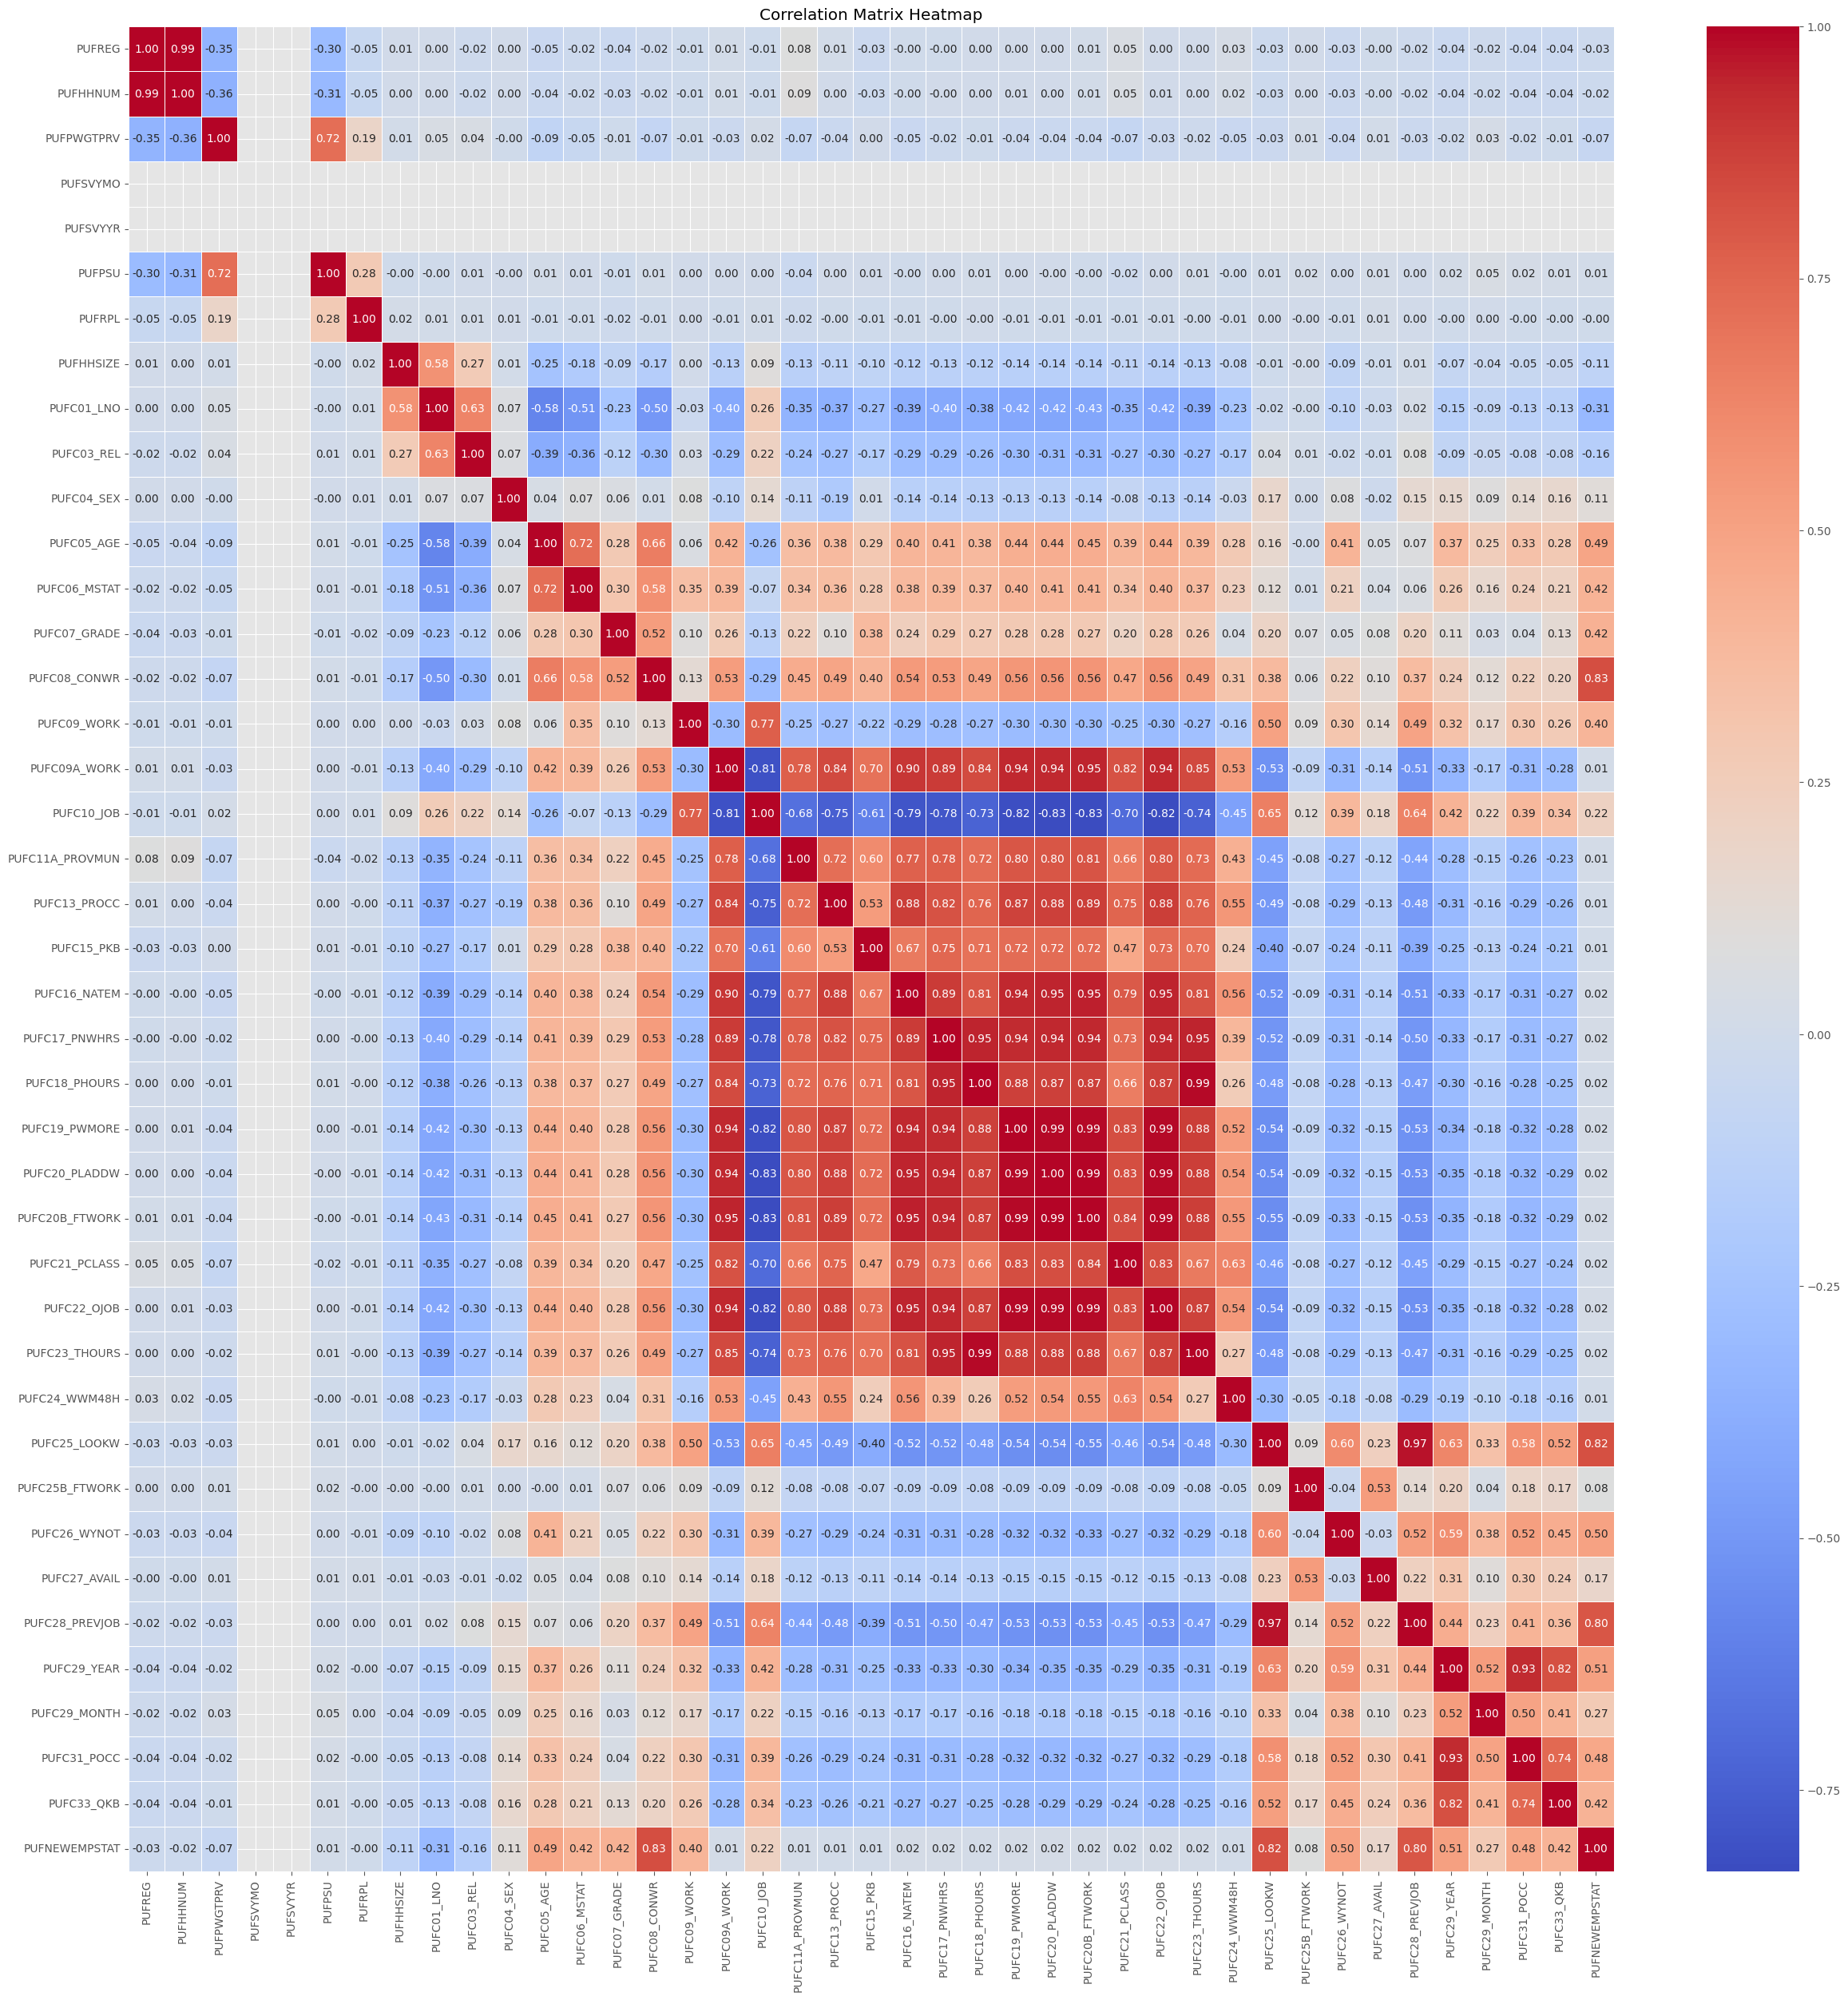

In [11]:
correlation_matrix = lfs_data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

However, given that the one of our group members has already done a deep dive into the nooks and crannies of this dataset, specifically investigating the dataset's included column dictionary and survey questionnaire, we will be proceeding with the feature engineering of the columns with the said member's domain knowledge.

The primary point of interest, moving forward, is the `PUFNEWEMPSTAT` column which identifies the individual's employability by analyzing its complex, and often composite, relationships with other columns.

#### Section 2.3.1 - **Demographics & Employability**

##### *Research Sub-Question:*
* How do age, sex, marital status, and region influence the probability of being employed?
<br><br>
> ##### *Why This Matters:*
> * Demographic characteristics such as age, sex, marital status, and region often correlate with labor force participation and are foundational predictors in labor market analysis. These variables capture both social structures and systemic inequalities that may influence hiring, availability, and types of employment. Understanding these patterns allows for contextualizing broader employment trends in the Philippines.

Now, let us explore those different variables individually according to each individual's Employment status; whether they are employed or unemployed. **Let's start by observing the histogram according to age.**

##### Histogram of Age split by `Employed` vs. `Unemployed`

Displayed below are the aggregated histograms of the different categories of the dataset's *Employed/Unemployed status* in comparison to the *Age* of the individual. 

Looking at employment status alone gives you a number. But comparing it with age gives you a story about the challenges and opportunities within a society. It allows for a much deeper, more nuanced understanding that is essential for effective and equitable policymaking

By interpreting these descriptive statistics on the context of one's age, we can gain significant insights into the demographic characteristics of the workforce represented in this dataset. 

First, we shall copy the Labor Force Survey DataFrame into a temporary variable, in order for us to temporarily change the equivalent values of each of the entries.

> * -1 for Unknown Employment Status
>
> * 1 for Employed Individuals
>
> * 2 for Unemployed Individuals
> 
> * 3 for Unemployed Individuals but only Temporarily

The latter 3 values came from the included dictionary Excel file of the dataset. The `-1` value is an imputation made in order to convert the entire column to become of integer64 data type.

We ought to separate the histograms for these four in order for us to better see the relationship of one's age is in relation to their current employment status.

In [12]:
df = lfs_data.copy()
df = df.rename(columns={
    'PUFC05_AGE': 'Age',
    'PUFNEWEMPSTAT': 'EmploymentStatus'
})

null_ages = df[df['EmploymentStatus'] == -1]['Age'].dropna()
employed_ages = df[df['EmploymentStatus'] == 1]['Age'].dropna()
unemployed_ages = df[df['EmploymentStatus'] == 2]['Age'].dropna()
temporarily_unemployed_ages = df[df['EmploymentStatus'] == 3]['Age'].dropna()

In order to properly overlay the different histograms according to age, we shall combine all age series into a single series and create consistent bins for such.

In [13]:
all_ages_for_bins = pd.concat([null_ages, employed_ages, unemployed_ages, temporarily_unemployed_ages]).dropna()
min_age = int(all_ages_for_bins.min())
max_age = int(all_ages_for_bins.max())

common_bins = np.linspace(min_age, max_age, 100)

All that's left to do is to actually plot the age distributions split by employment status and display statistics for each status.

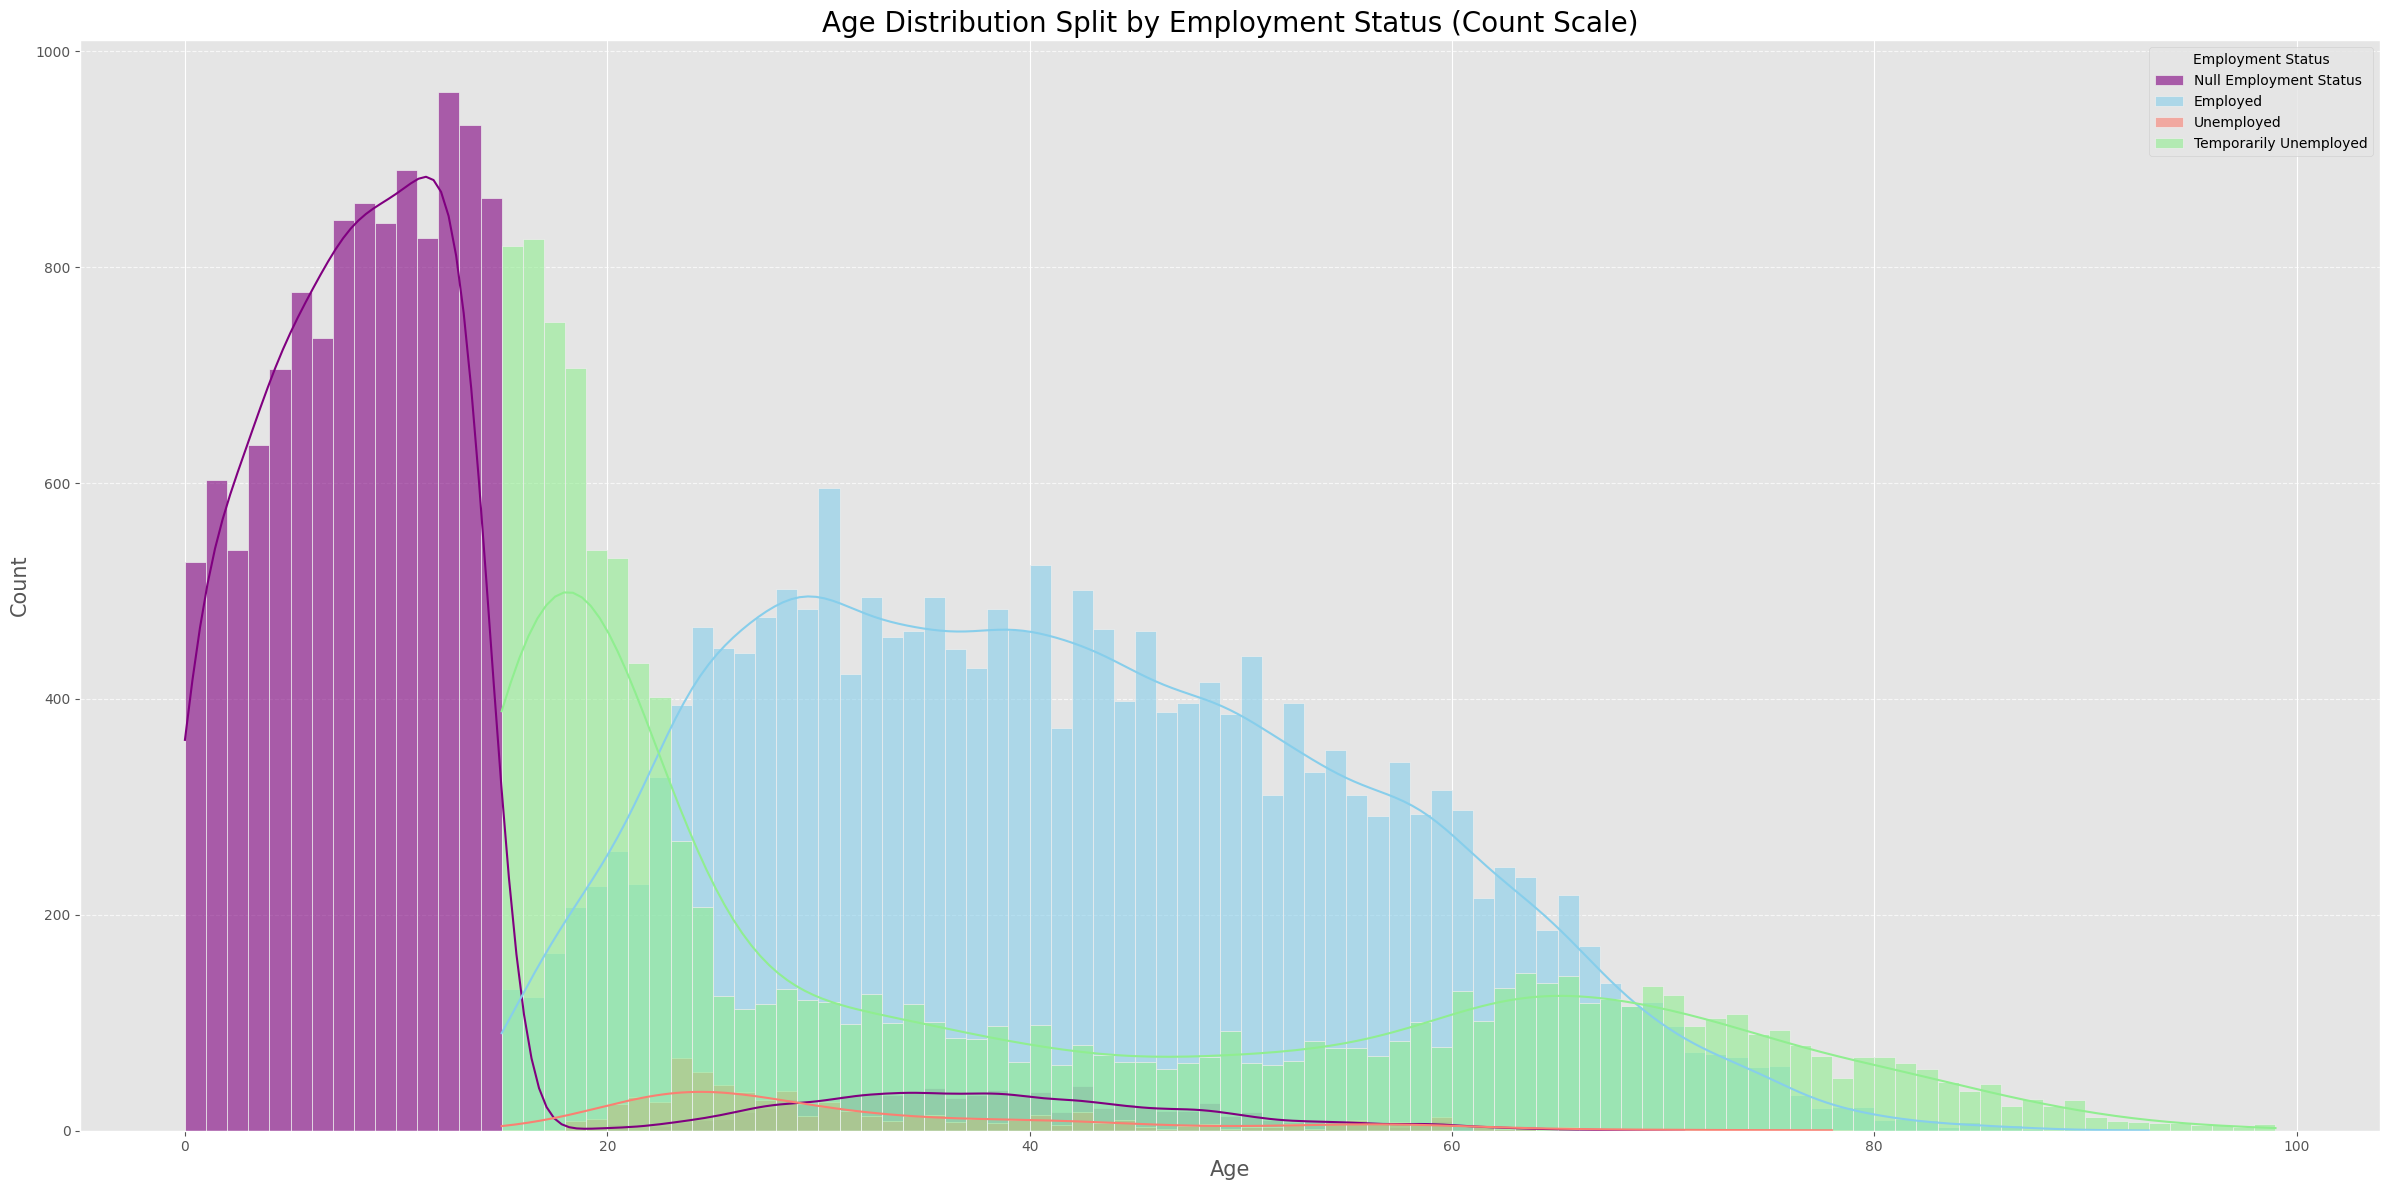

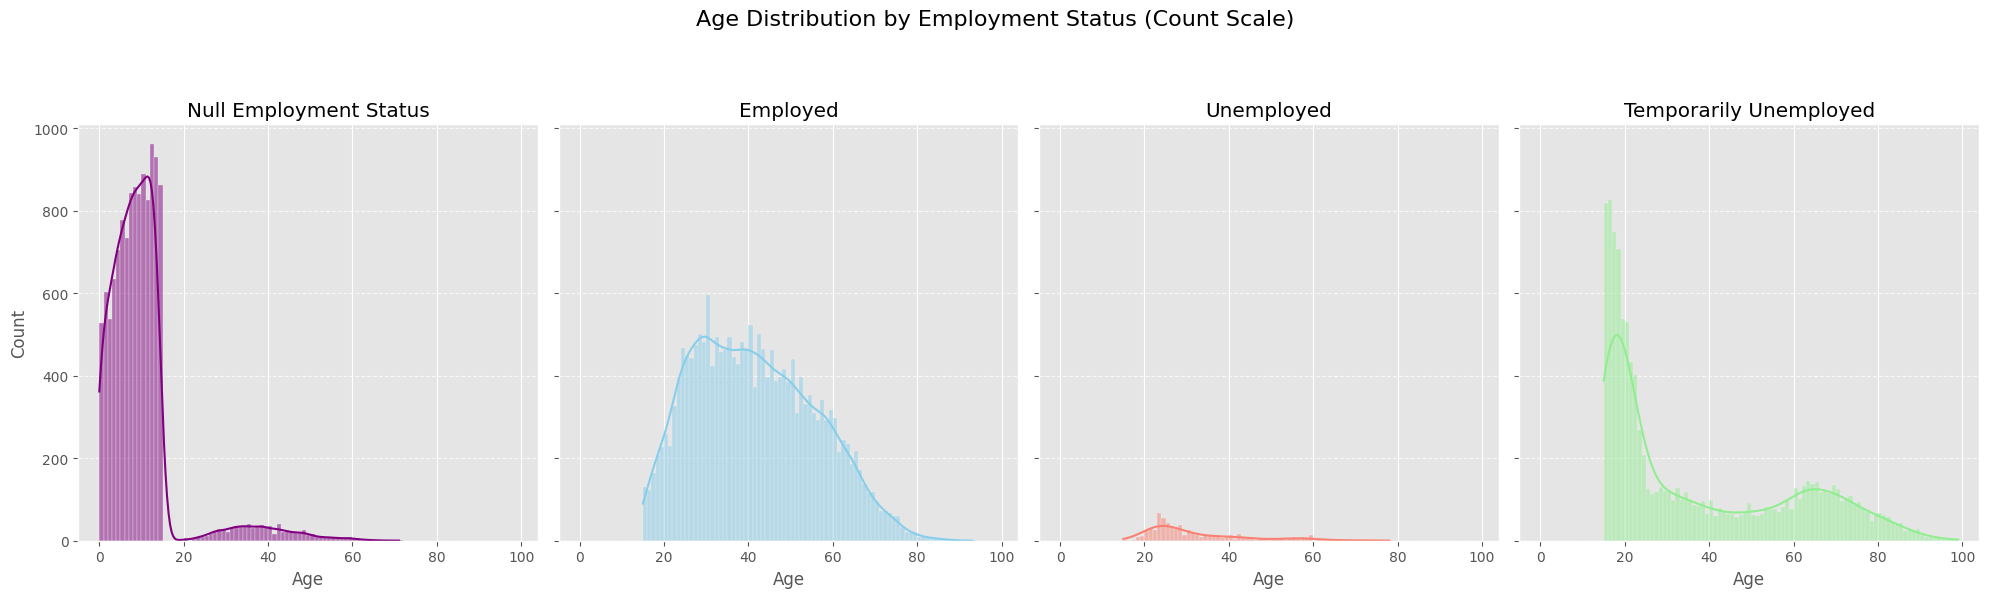

Statistics for all employment statuses:

--- Individuals with Null Employment Status ---
  Number of Individuals: 12348
  Mean Age: 9.73
  Median Age: 8.00
  Mode Age: [12]
  Standard Deviation of Age: 9.01

--- Individuals with Employed Status ---
  Number of Individuals: 19848
  Mean Age: 41.34
  Median Age: 40.00
  Mode Age: [30]
  Standard Deviation of Age: 14.46

--- Individuals with Unemployed Status ---
  Number of Individuals: 670
  Mean Age: 32.15
  Median Age: 28.00
  Mode Age: [23]
  Standard Deviation of Age: 12.19

--- Individuals with Temporarily Unemployed Status ---
  Number of Individuals: 11197
  Mean Age: 36.87
  Median Age: 25.00
  Mode Age: [16]
  Standard Deviation of Age: 22.34


In [14]:
plt.figure(figsize=(24, 12))

plot_stat = 'count'

sns.histplot(null_ages, bins=common_bins, color='purple', label='Null Employment Status', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(employed_ages, bins=common_bins, color='skyblue', label='Employed', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(unemployed_ages, bins=common_bins, color='salmon', label='Unemployed', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(temporarily_unemployed_ages, bins=common_bins, color='lightgreen', label='Temporarily Unemployed', alpha=0.6, kde=True, stat=plot_stat)

plt.title(f'Age Distribution Split by Employment Status ({plot_stat.capitalize()} Scale)', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel(f'{plot_stat.capitalize()}', fontsize=15)
plt.legend(title='Employment Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# show individual plots for each employment status for better clarity in comparison
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True) # 4 subplots

# plot for Null Employment Status
sns.histplot(null_ages, bins=common_bins, color='purple', kde=True, ax=axes[0], stat=plot_stat)
axes[0].set_title('Null Employment Status')
axes[0].set_xlabel('Age')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# plot for Employed
sns.histplot(employed_ages, bins=common_bins, color='skyblue', kde=True, ax=axes[1], stat=plot_stat)
axes[1].set_title('Employed')
axes[1].set_xlabel('Age')
axes[1].set_ylabel(f'{plot_stat.capitalize()}')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# plot for Unemployed
sns.histplot(unemployed_ages, bins=common_bins, color='salmon', kde=True, ax=axes[2], stat=plot_stat)
axes[2].set_title('Unemployed')
axes[2].set_xlabel('Age')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# plot for Temporarily Unemployed
sns.histplot(temporarily_unemployed_ages, bins=common_bins, color='lightgreen', kde=True, ax=axes[3], stat=plot_stat)
axes[3].set_title('Temporarily Unemployed')
axes[3].set_xlabel('Age')
axes[3].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle(f'Age Distribution by Employment Status ({plot_stat.capitalize()} Scale)', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Statistics for all employment statuses:")
i=0
for status_name, ages_series in {
    "Individuals with Null Employment Status": null_ages,
    "Individuals with Employed Status": employed_ages,
    "Individuals with Unemployed Status": unemployed_ages,
    "Individuals with Temporarily Unemployed Status": temporarily_unemployed_ages
}.items():
    if not ages_series.empty:
        print(f"\n--- {status_name} ---")
        print(f"  Number of Individuals: {len(ages_series)}")
        print(f"  Mean Age: {ages_series.mean():.2f}")
        print(f"  Median Age: {ages_series.median():.2f}")
        print(f"  Mode Age: {ages_series.mode().tolist()}")
        print(f"  Standard Deviation of Age: {ages_series.std():.2f}")

        i+=1
    else:
        print(f"\n--- {status_name} (No data) ---")

Let us now interpret the data we have received.

#### --- **Individuals with Null Employment Status** ---

This group predominantly consists of children and young adolescents.

* The mean age of approximately 10 years old and a median age of 8 strongly indicate a very young demographic.
    * This is further supported by the way that the survey is structured: children under the recommended age (of 15 years old) to participate in the labor force are excluded from being *employed* in the eyes of the Philippine Statistics Authority. We shall investigate this further in the sections below.
* The mode of 12 shows that this is the most frequent age in this category.
    * **Most kids are not employed**; as they should not be.
* A standard deviation of 9.01 suggests some variability, likely including some infants and older teenagers, but the central tendency is clearly in childhood.
* The "Null" employment status is appropriate for this group as they are generally not part of the labor force. This category likely includes students and individuals too young to work.
* As for those within the **16 to 80 age range** that have a **Null Employment Status**, no part of the physical questionnaire indicate why they might have such status. And so these entries in the dataset are excellent **candidates to be cleaned** and deleted from the data frame.

<br>

#### --- **Individuals with Employed Status** ---

* This group represents the core of the workforce in their prime working years.

* The mean age of 41.34 and median age of 40 are **typical ages for an established workforce**; 41.6 according to the *US Bureau of Labor Statistics* (2024)
* The mode of 30 suggests a significant number of individuals in their early-to-mid career stages.
* The standard deviation of 14.46 indicates a broader age range compared to the "Null" group, which is expected as it encompasses early-career professionals to those nearing retirement. This is the largest group in this dataset, which is a **positive economic indicator**.

<br>

#### --- **Individuals with Unemployed Status** ---

* This group appears to be composed of younger adults who are actively seeking work.

* The mean age of 32.15 and median of 28 are significantly younger than the employed group.
* The mode of 23 is particularly telling, as this is an age when many have **recently completed their education and are entering the job market**.
* The relatively smaller number of individuals (670) in this category is a positive sign for the overall employment situation in this dataset.

<br>

#### --- **Individuals with Temporarily Unemployed Status** ---

* This is a very (if not, the most) interesting and diverse group, likely representing a mix of individuals with different circumstances.

* The mean age is 36.87, which is closer to the employed group. However, the median age is much lower at 25. This large difference between the mean and median suggests a *right-skewed distribution*. This means there is a **substantial number of younger individuals**, but also a **long tail of older individuals** who are **temporarily without a job**, and so are pulling the average age up for this category.
* The mode of 16 is quite young and could represent students who have part-time or seasonal jobs and are currently in an "off" period, or individuals who have just finished basic education and are in a transitional phase.
* The very high standard deviation of 22.34 confirms the wide age spread in this category. It likely includes:
    * Younger individuals in seasonal or contractual work.
    * Older individuals who might be between contracts, on temporary leave, or experiencing a short-term layoff.
* The "Temporarily Unemployed" status could encompass a wide range of situations, from students on break to gig economy workers between assignments.

<br>

#### --- **Summary** ---
- The "Null" status correctly identifies a population group that is largely too young to be part of the workforce.
- The "Employed" group is concentrated in the prime working ages, as expected.
- The "Unemployed" are younger individuals likely at the start of their careers and actively seeking employment.
- The "Temporarily Unemployed" category is the most varied in terms of age. The skewed distribution points to a mix of younger individuals in precarious work situations and a smaller number of older, more experienced workers who are temporarily without work. This group warrants further investigation to understand the different sub-populations within it.

##### For further analysis as to why the Employed/Unemployed status was a chosen feature columns:

> `PUFNEWEMPSTAT` is the PSA's new category (implemented for 2005 onwards) for a Filipino individual's employment status. This was not present in the previous datasets from the previous years provided by the government agency and is only a recent addition.
>
> Previously, the only columns that allowed for the prediction of employment status are the columns:
>
> - `PUFC09_WORK` (which asked the question: _Did the person do any work for at least one hour during the past week?_) and 
>
> - `PUFC30_LOOKW` (which asked the question: _Did the person look for work or try to establish a business in the past week?_)
>
> Although these variables are technically related to whether or not a person is a professional who may have a career, who is waged, and is hired, these two variables are unable to accurately tell whether the same person is ***employed***. This is due to different factors in the Philippine setting (still within the dataset) such as: (1) having contractual work only for the week, (2) is hired but only receive pay through goods and not legal tender, (3) has work but has insufficient number of paid hours to pay bills, etc.
> 
> These variables are still available in the current version and will thus still be investigated later on within this notebook. But as there exists an easier way to identify the current status of an individual in terms of whether they are currently employed or not, we have decided to use this variable.

___

#### Histogram of Age split by `PUFC09_WORK` (WorkIndicator - _Did the person do any work for at least one hour during the past week?_)

As mentioned in the cell above, `PUFC09_WORK` asks a similar question to the Employed/Unemployed column but in a more specific sense. The survey asks the individual whether or not they have exerted any form of labor for an employer at any point during the week. This is crucial to the survey because it acquires a straightforward **Yes/No answer** (Boolean Data Type in the dataset) from the respondent regarding their **recent work activity *for the week***, which paves the way to further investigation or questioning along the survey: regarding whether they're currently working with no pay (non-profit, family business therefore no official payment), whether they have done less than so-so number of hours this week (part-time, freelancing, or even unstable work hours), etc.

Its primary purpose is to capcure some of the economic activity of a person, may their activity be formal or informal. It serves as a gateway question for more in-depth investigation, as indicated by the structure of the survey questionnaire. This column is *extremely crucial* especially in the Philippine context because of the the broad definition of "work", where the informal economy (e.g., street vendors, unpaid family farm workers) is a significant part of total employment, and therefore a significant part of the economy as well.

#### How is `PUFC09_WORK` different from `PUFNEWEMPSTAT`?

- **PUFC09_WORK is a behavioral screening question**. Its purpose is to capture any form of work, no matter how small or informal.
    - It helps prevent misclassifying a regular employee who was simply on a one-week vacation as "unemployed."
    - The "work for at least one hour" standard is intentionally low to capture everyone. By combining this with data from other columns like `PUFC18_PHOURS` (_What is the total number of hours you have worked in the past week?_) and `PUFC20_PWMORE` (_Did you want to work more hours this week?_), you can identify the underemployed—people who are employed but worked less than 40 hours and wanted more work.
- **PUFNEWEMPSTAT is a derived classification**. It is not a question asked directly to the respondent but is a final status assigned by the Philippine Statistics Authority after considering the answers to several questions.
- PUFC09_WORK is the raw input, while PUFNEWEMPSTAT is the refined, analytical output.

With all that in mind and the use of the `PUFNEWEMPSTAT` column proven, let us just take a look at how the `PUFC09_WORK` column looks like when compared to the Age collumn; as done similarly in the previous histogram overlay comparison.

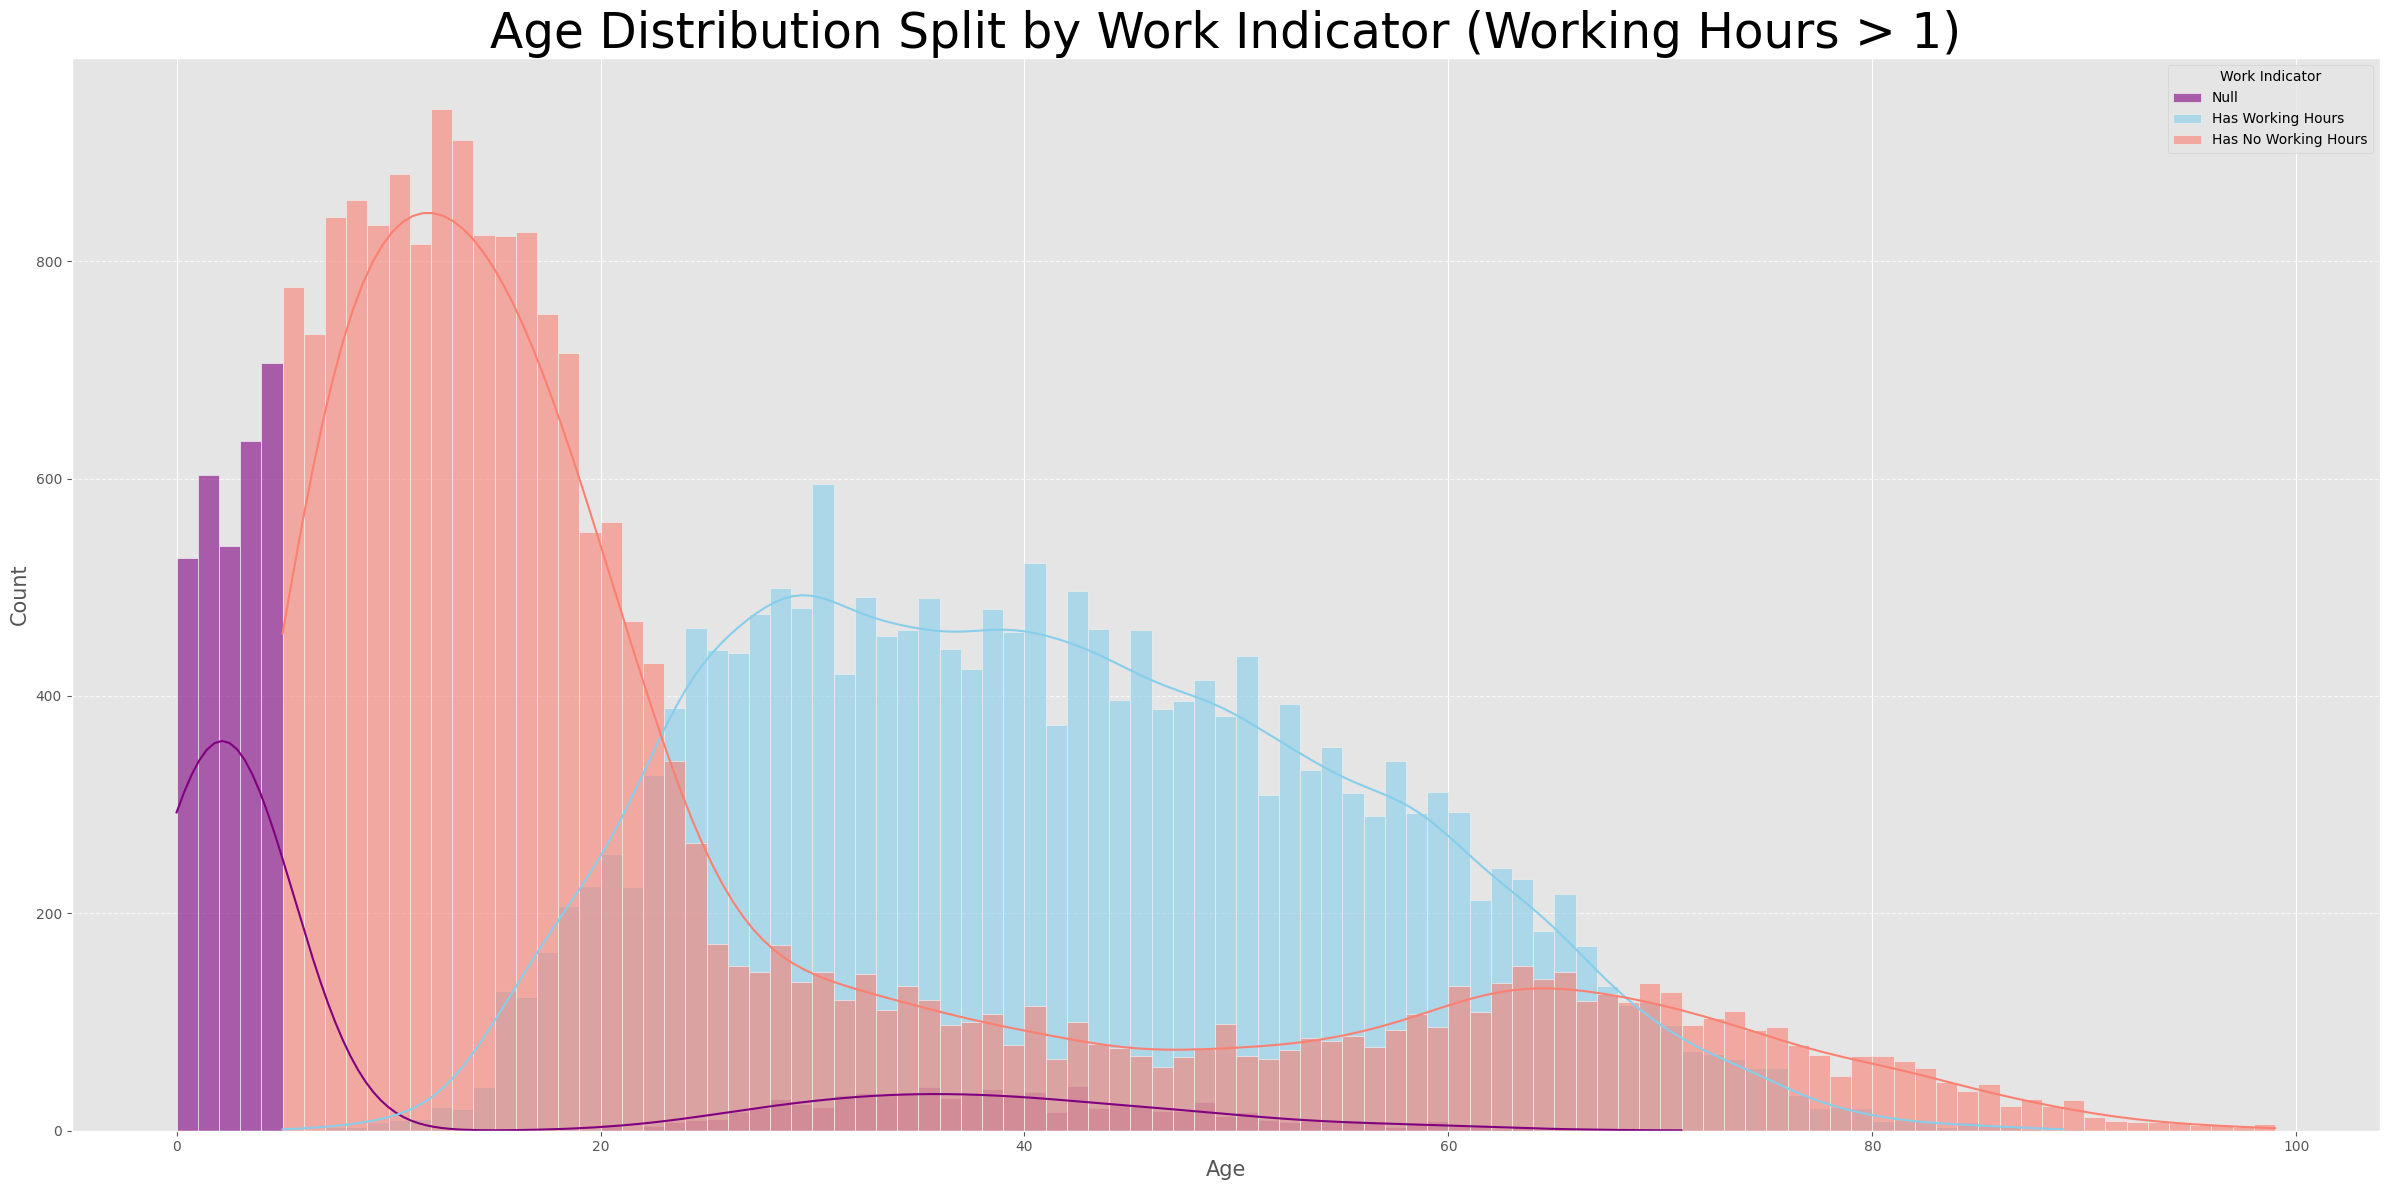

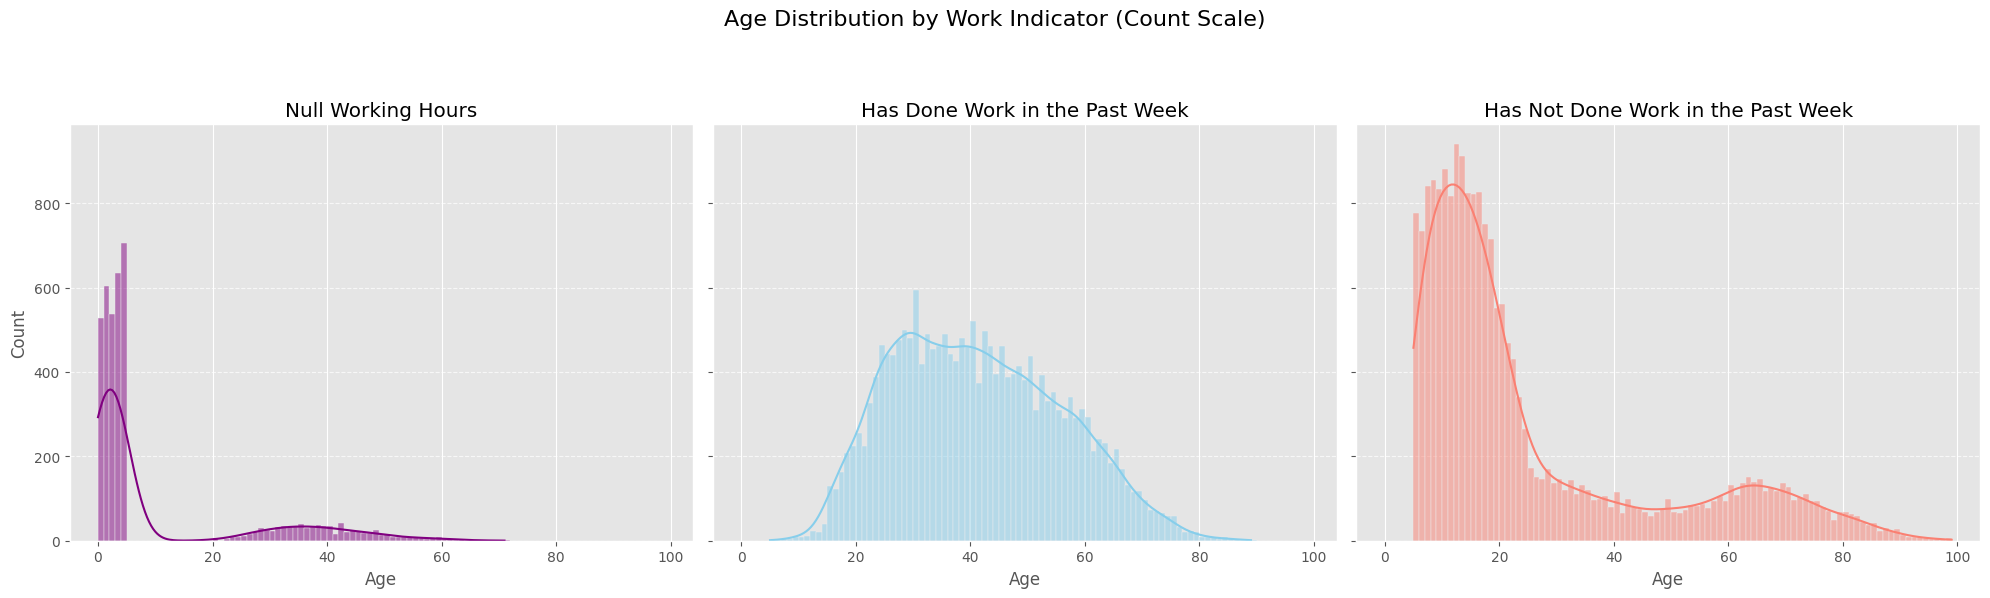

Statistics for all employment statuses:

--- Individuals with Null Working Hours in the Past Week ---
  Number of Individuals: 3818
  Mean Age: 9.90
  Median Age: 3.00
  Mode Age: [4]
  Standard Deviation of Age: 15.63

--- Individuals with at least 1 Working Hour in the Past Week ---
  Number of Individuals: 19832
  Mean Age: 41.16
  Median Age: 40.00
  Mode Age: [30]
  Standard Deviation of Age: 14.56

--- Individuals with no Working Hours in the Past Week ---
  Number of Individuals: 20413
  Mean Age: 25.53
  Median Age: 17.00
  Mode Age: [12]
  Standard Deviation of Age: 21.50


In [15]:
df = lfs_data.copy()
df = df.rename(columns={
    'PUFC05_AGE': 'Age',
    'PUFC09_WORK': 'WorkIndicator'
})

null_work = df[df['WorkIndicator'] == -1]['Age'].dropna()
has_work = df[df['WorkIndicator'] == 1]['Age'].dropna()
no_work = df[df['WorkIndicator'] == 2]['Age'].dropna()

all_ages_for_bins = pd.concat([null_work, has_work, no_work]).dropna()
min_age = int(all_ages_for_bins.min())
max_age = int(all_ages_for_bins.max())

common_bins = np.linspace(min_age, max_age, 100)

plt.figure(figsize=(24, 12))

plot_stat = 'count'

sns.histplot(null_work, bins=common_bins, color='purple', label='Null', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(has_work, bins=common_bins, color='skyblue', label='Has Working Hours', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(no_work, bins=common_bins, color='salmon', label='Has No Working Hours', alpha=0.6, kde=True, stat=plot_stat)

plt.title(f'Age Distribution Split by Work Indicator (Working Hours > 1)', fontsize=35)
plt.xlabel('Age', fontsize=15)
plt.ylabel(f'{plot_stat.capitalize()}', fontsize=15)
plt.legend(title='Work Indicator', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

sns.histplot(null_work, bins=common_bins, color='purple', kde=True, ax=axes[0], stat=plot_stat)
axes[0].set_title('Null Working Hours')
axes[0].set_xlabel('Age')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(has_work, bins=common_bins, color='skyblue', kde=True, ax=axes[1], stat=plot_stat)
axes[1].set_title('Has Done Work in the Past Week')
axes[1].set_xlabel('Age')
axes[1].set_ylabel(f'{plot_stat.capitalize()}')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(no_work, bins=common_bins, color='salmon', kde=True, ax=axes[2], stat=plot_stat)
axes[2].set_title('Has Not Done Work in the Past Week')
axes[2].set_xlabel('Age')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle(f'Age Distribution by Work Indicator ({plot_stat.capitalize()} Scale)', fontsize=16, y=1.02) # Main title for subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

print("Statistics for all employment statuses:")
i=0
for status_name, ages_series in {
    "Individuals with Null Working Hours in the Past Week": null_work,
    "Individuals with at least 1 Working Hour in the Past Week": has_work,
    "Individuals with no Working Hours in the Past Week": no_work,
}.items():
    if not ages_series.empty:
        print(f"\n--- {status_name} ---")
        print(f"  Number of Individuals: {len(ages_series)}")
        print(f"  Mean Age: {ages_series.mean():.2f}")
        print(f"  Median Age: {ages_series.median():.2f}")
        print(f"  Mode Age: {ages_series.mode().tolist()}")
        print(f"  Standard Deviation of Age: {ages_series.std():.2f}")

        i+=1
    else:
        print(f"\n--- {status_name} (No data) ---")

As we can see, the **Null Work Indicator**, **True Working Hours** (Has Done Work in the Past Week), and **False Work Indicator** (Has Not Done Work in the Past Week) all coincide and look similar to the histograms in the previous section of this notebook. 

At this point, it is unnecessary to perform a Goodness of Fit Test as our primary goal for investigating this Age vs WorkIndicator comparison is to understand the purpose of the `PUFNEWEMPSTAT` column (proving that the `PUFC09_WORK` WordIndicator column is insufficient to be used as a primary indicator for employability). These Summary Statistics are enough proof for such.

___

##### Stacked bar plot: `Sex` vs. `Employment Status`

Let's move forward by comparing Sex with `PUFNEWEMPSTAT`.


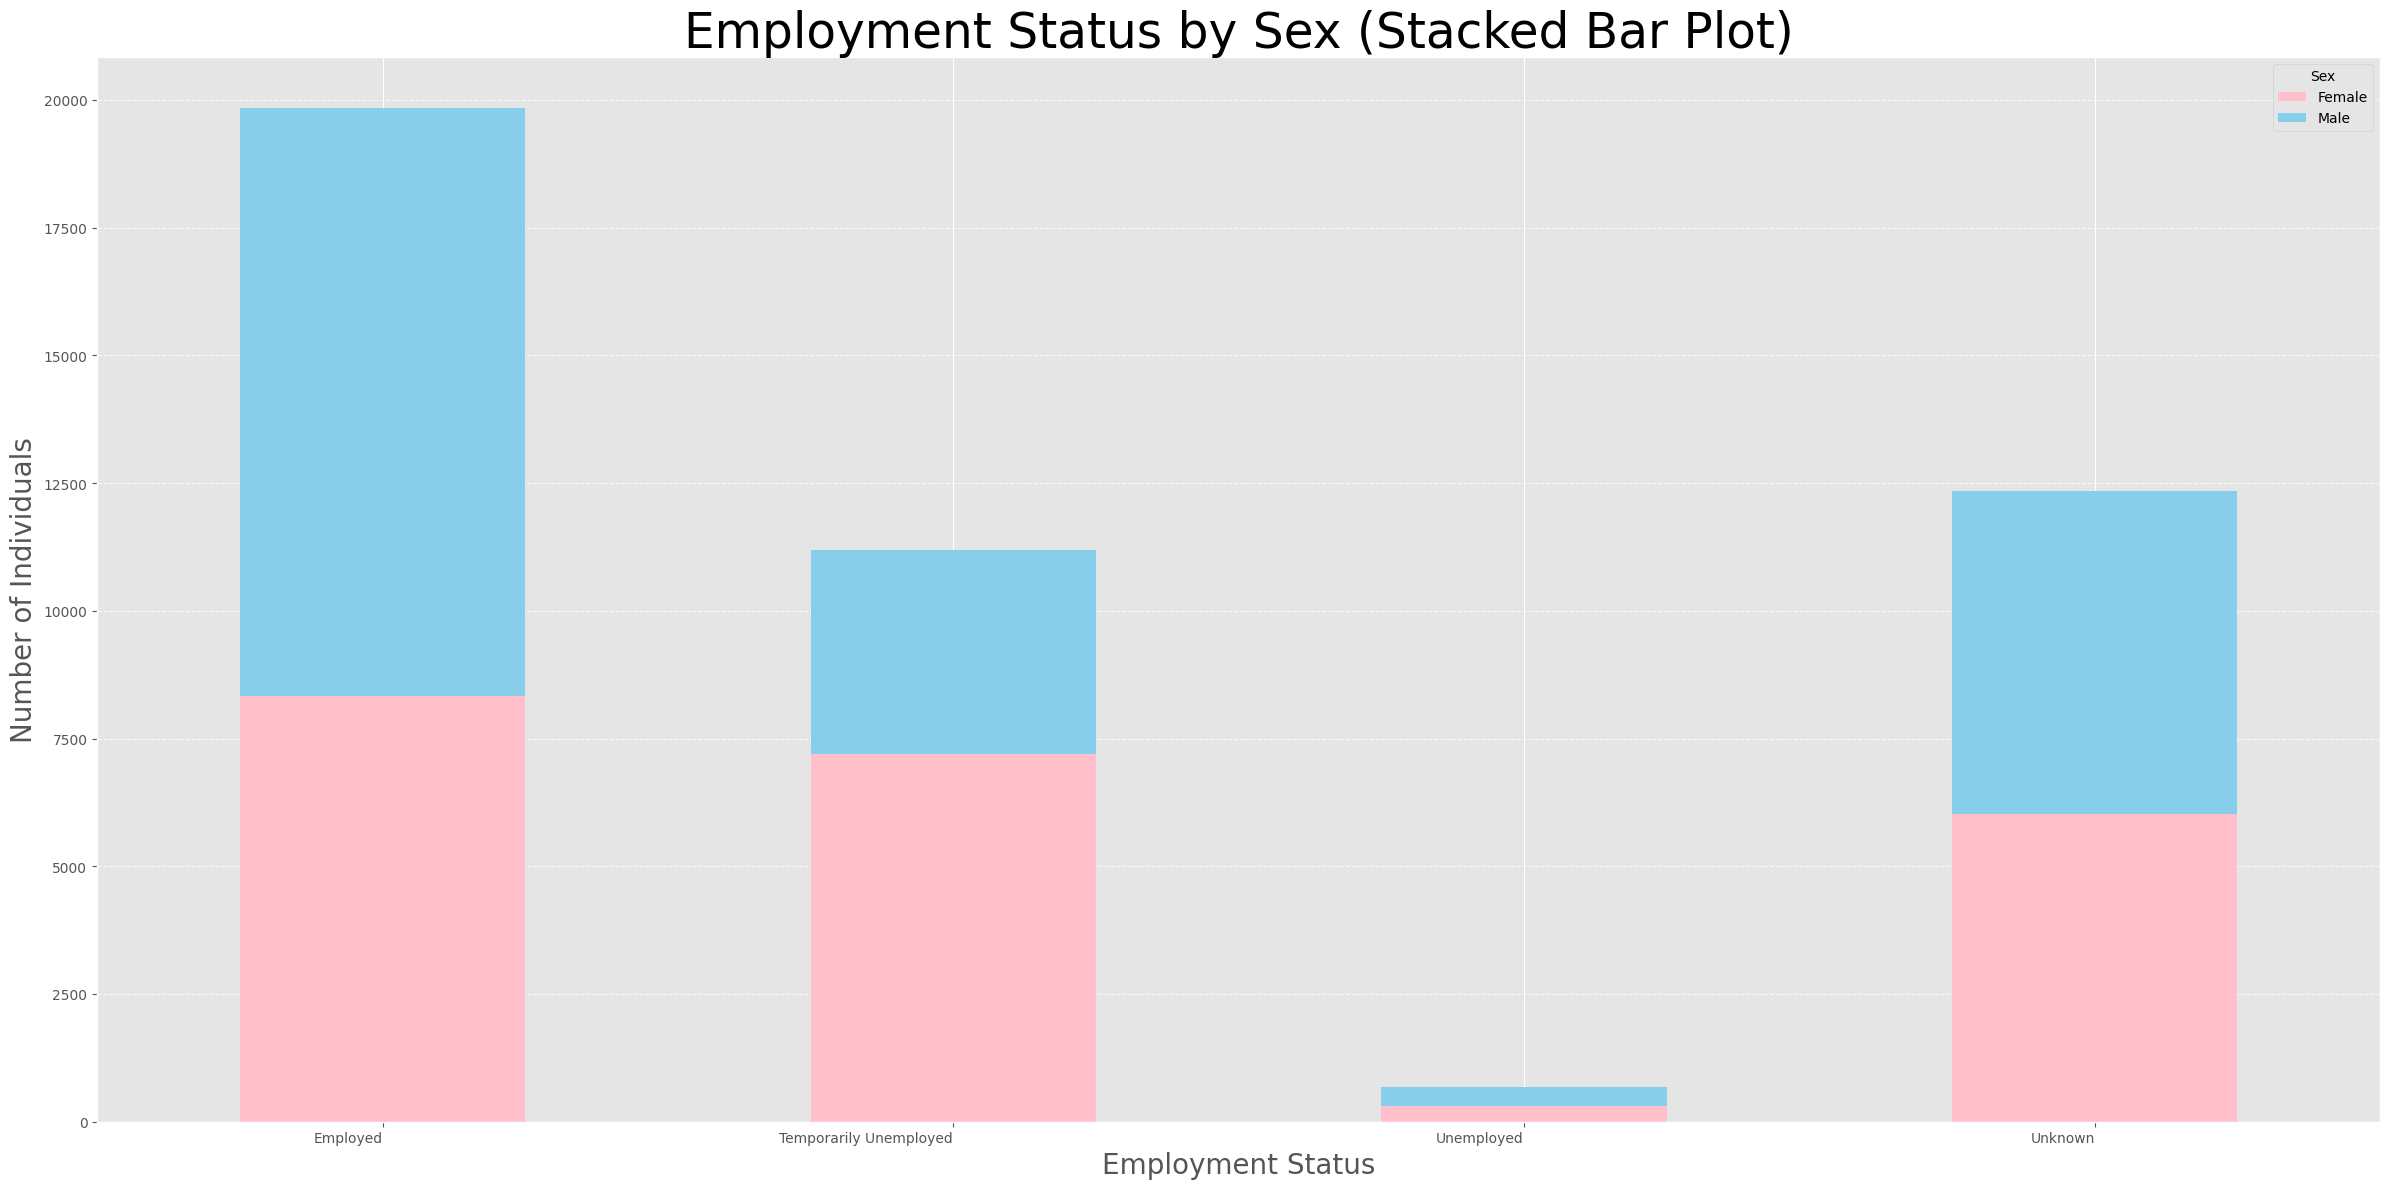

In [16]:
lfs_mapped = lfs_data.copy()
sex_mapping = {1: 'Male', 2: 'Female'}
employment_status_mapping = {-1: 'Unknown', 1: 'Employed', 2: 'Unemployed', 3: 'Temporarily Unemployed'}
lfs_mapped['PUFC04_SEX'] = lfs_mapped['PUFC04_SEX'].map(sex_mapping)
lfs_mapped['PUFNEWEMPSTAT'] = lfs_mapped['PUFNEWEMPSTAT'].map(employment_status_mapping)

employment_sex_counts = lfs_mapped.groupby(['PUFNEWEMPSTAT', 'PUFC04_SEX']).size().unstack(fill_value=0)

plt.figure(figsize=(24, 12))

columns_to_plot = employment_sex_counts.columns.tolist()
custom_colors = ['skyblue' for _ in columns_to_plot]
if 'Female' in columns_to_plot:
    female_index = columns_to_plot.index('Female')
    custom_colors[female_index] = 'pink'
employment_sex_counts.plot(kind='bar', stacked=True, color=custom_colors, ax=plt.gca())

plt.title('Employment Status by Sex (Stacked Bar Plot)', fontsize=35)
plt.xlabel('Employment Status', fontsize=20)
plt.ylabel('Number of Individuals', fontsize=20)
plt.xticks(rotation=0, ha='right')
plt.legend(title='Sex', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

While looking at age and employment tells you when people work in their lifecycle, and looking at sex and employment shows differences between men and women, combining age and sex uncovers the crucial interaction between the two. We want to compare age and sex in this context to move beyond generalities and identify specific, actionable insights into how societal roles, economic pressures, and life events affect men and women differently at different stages of their lives.

Let us try comparing two of the demographic characteristics columns with each other. Let's compare the Age of an individual to their Sex.

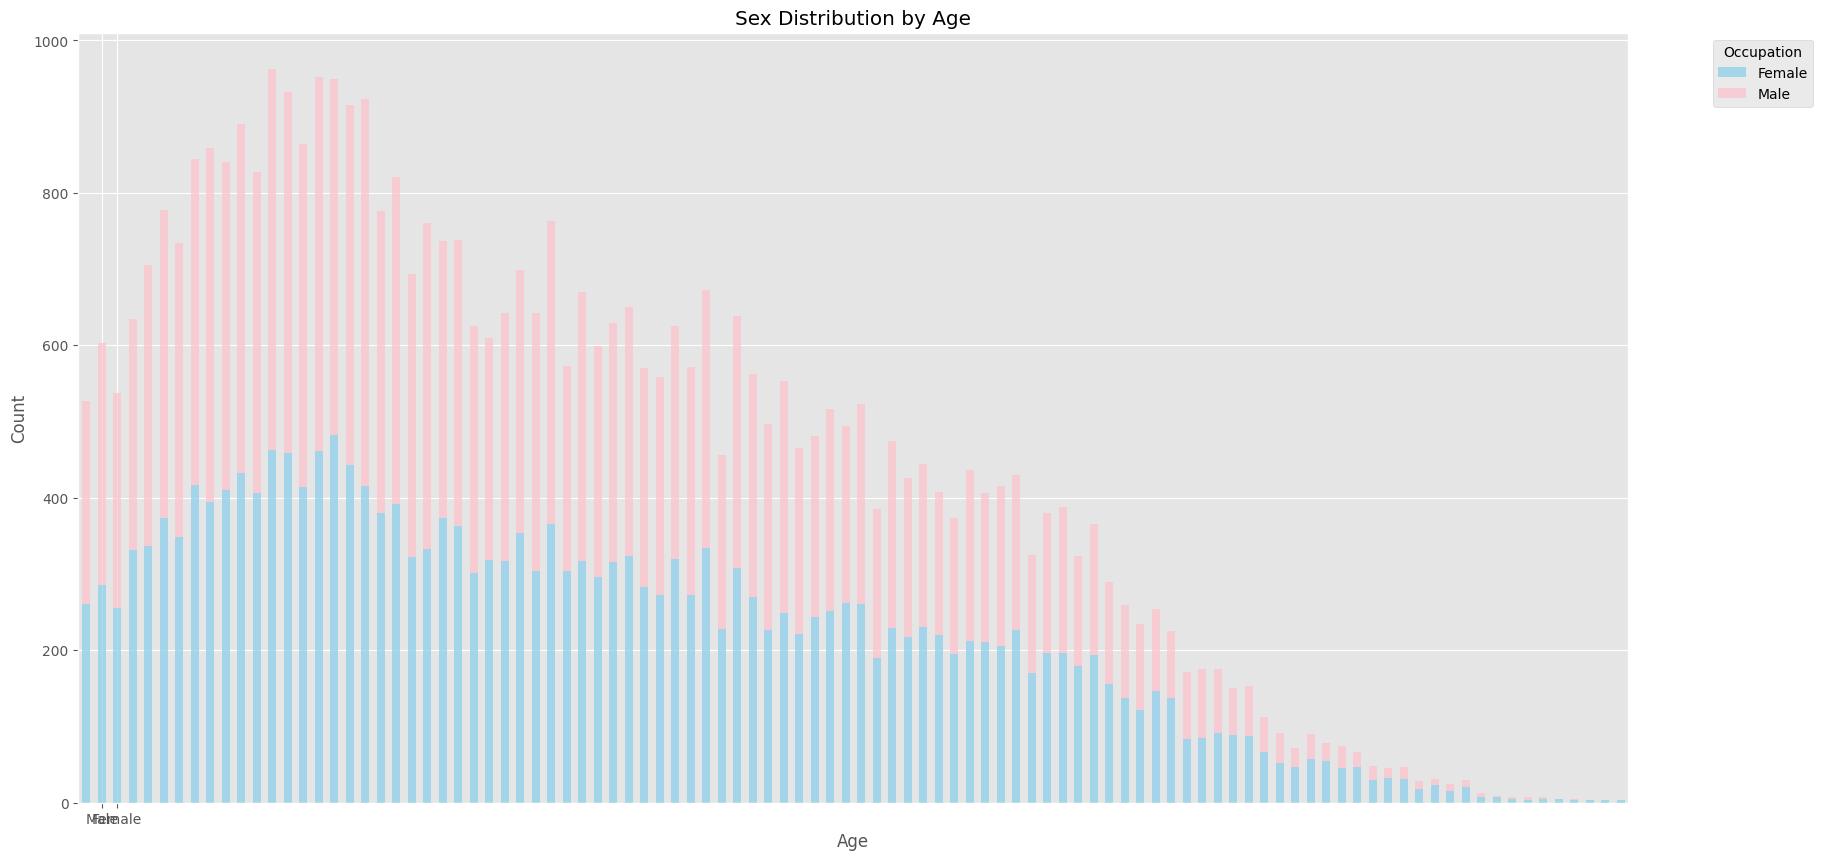

In [17]:
age_sex = lfs_mapped.groupby(['PUFC05_AGE', 'PUFC04_SEX']).size().unstack(fill_value=0)
age_sex.plot(kind='bar', stacked=True, figsize=(20, 10), color=['skyblue', 'pink'], alpha=0.7)
plt.title('Sex Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks([1, 2], ['Male', 'Female'], rotation=0)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

With this distribution of the relationship of sex to age, we can confirm that even across all ages, both sexes are relatively equal.

There also exists a positive skew on the distribution, where majority of the population are mostly the young, and those above the age of 60 are way lower.

Let's view this with a different lens; compare the occupations of the Filipino population with their ages.

In [18]:
sex_colors = {
    'Male': 'skyblue',
    'Female': 'lightpink'
}

employment_statuses = [
    'Unknown',
    'Employed',
    'Unemployed',
    'Temporarily Unemployed'
]

df = lfs_mapped.copy()
df = df.rename(columns={
    'PUFC05_AGE': 'Age',
    'PUFNEWEMPSTAT': 'EmploymentStatus',
    'PUFC04_SEX': 'Sex'
})

all_ages_for_bins = df['Age'].dropna()
min_age = int(all_ages_for_bins.min())
max_age = int(all_ages_for_bins.max())
common_bins = np.linspace(min_age, max_age, 100)
bin_centers = (common_bins[:-1] + common_bins[1:]) / 2


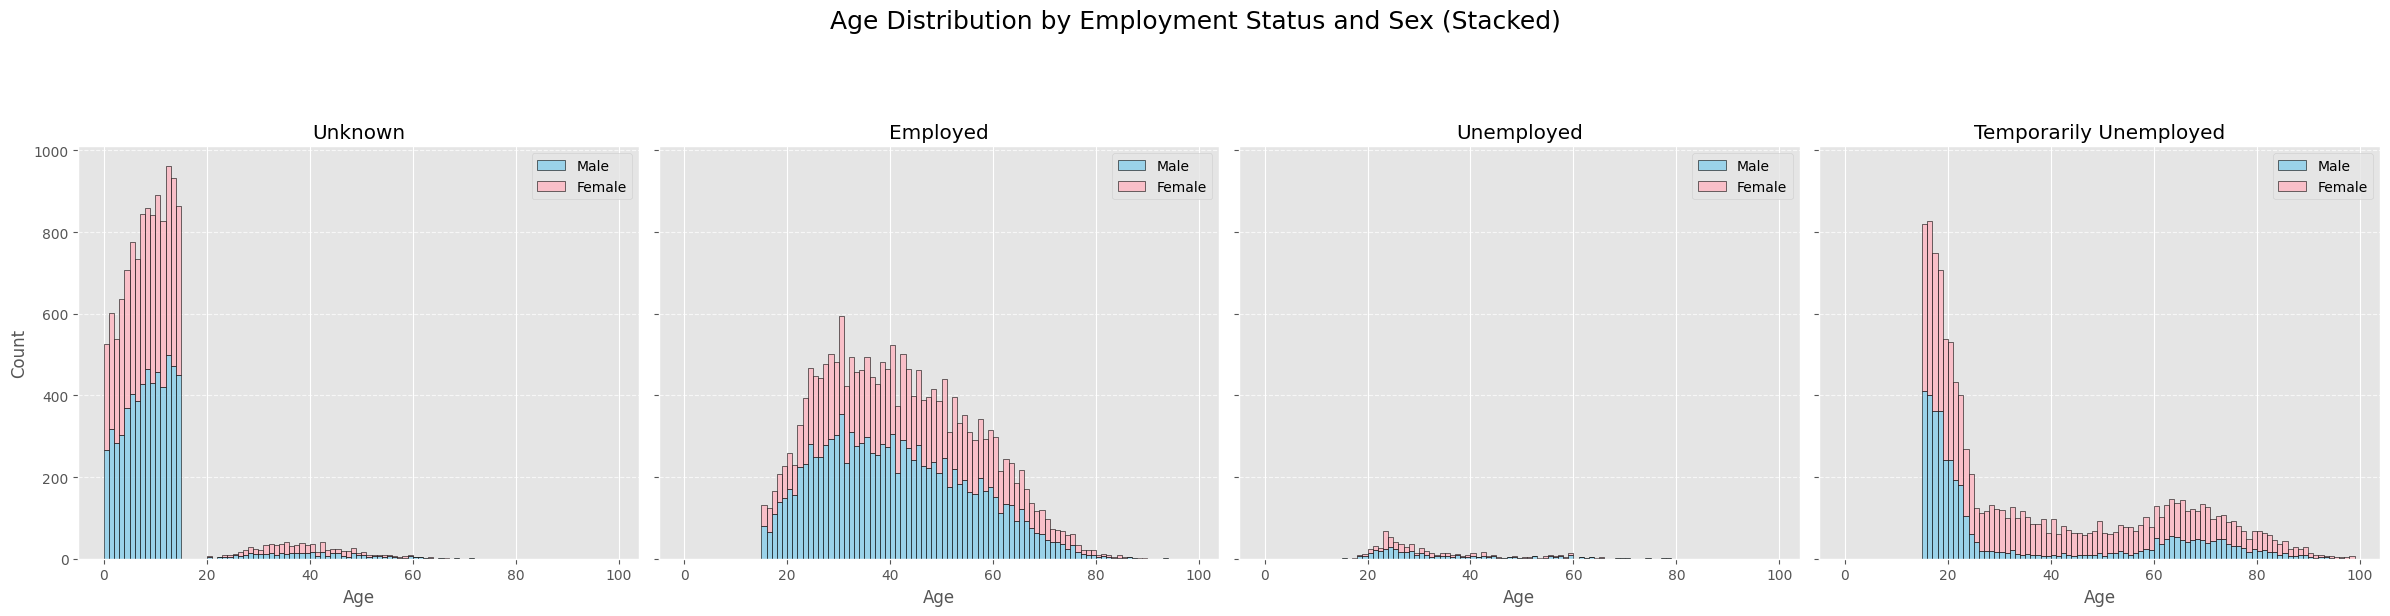

In [19]:

fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

for i, status in enumerate(employment_statuses):
    ax = axes[i]
    subset = df[df['EmploymentStatus'] == status]
    
    # Hist counts for Male and Female separately
    counts_by_sex = {}
    for sex_value in sex_colors.keys():
        sex_subset = subset[subset['Sex'] == sex_value]['Age'].dropna()
        counts, _ = np.histogram(sex_subset, bins=common_bins)
        counts_by_sex[sex_value] = counts

    # Stack bars
    bottom = np.zeros_like(bin_centers)
    for sex_value, color in sex_colors.items():
        counts = counts_by_sex[sex_value]
        ax.bar(
            bin_centers,
            counts,
            width=np.diff(common_bins)[0],
            label=sex_value,
            bottom=bottom,
            color=color,
            alpha=0.8,
            edgecolor='black'
        )
        bottom += counts  # Update bottom for next stack

    ax.set_title(status)
    ax.set_xlabel('Age')
    if i == 0:
        ax.set_ylabel('Count')
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Age Distribution by Employment Status and Sex (Stacked)', fontsize=18, y=1.05)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


If we compare this to the first stacked bar chart of this section, we can see that the individuals who are employed are truly the largest group among the 4 categories with a relatively equal distribution between Male and Female.

So goes for the other two: Unknown (the kids who are not in the workforce yet) and the Unemployed.

What could be interesting to look at, however, is that those who are Temporarily Unemployed have a greater Female to Male ratio; meaning that there currently exists more women who currently do not have employment. This could be an indicator of: 
- cultural factors (ie. these women in their "caregiving years" as indicated by the high ratio of females in the 20 to 40 year old range who are temporarily unemployed); or
- periodic factors (ie. lay-offs in Male-Dominated Fields/Female-Dominated Fields for this specific year)

Without investigating the previous dataset as well, this might be a difficult question to answer. 

In [20]:
mode_sex_by_employment_status = df.groupby('EmploymentStatus')['Sex'].apply(lambda x: x.mode()[0])
mode_sex_by_employment_status

EmploymentStatus
Employed                    Male
Temporarily Unemployed    Female
Unemployed                  Male
Unknown                     Male
Name: Sex, dtype: object

In [21]:
# ratio of male to female per employment status
male_female_ratio = employment_sex_counts['Male'] / employment_sex_counts['Female']
ratio_df = male_female_ratio.reset_index().rename(columns={0: 'Male to Female Ratio', 'PUFNEWEMPSTAT': 'Employment Status'})
print(ratio_df)

        Employment Status  Male to Female Ratio
0                Employed              1.380142
1  Temporarily Unemployed              0.556003
2              Unemployed              1.196721
3                 Unknown              1.047761


However, if we do a simple function call to find the (Measure of Central Tendency) Mode of the Sexes for each Employment Status, we can see that this claim on cultural factors might prove, though unfortunate, much more plausible.

All things considered, we could say that at least for the Employed individuals of the current workforce, there exists a good balance between Male and Female Filipinos.

___

##### Bar plot: `Marital Status` vs. % `Employed`

Lastly, for the final demographic characteristic of interest in the dataset, let us investigate the Marital Status of Filipino individuals compared to their Employment Status.

Investigating the relationship between marital status and employment status in the Philippines is not just an interesting demographic exercise; it is crucial for uncovering the deep-seated economic and social structures that shape an individual's life and the nation's economy as a whole.

In the Philippines, family is the central social unit, and traditional gender roles, while evolving, still exert a powerful influence. Analyzing marital status against employment data allows us to quantify the impact of these norms.

Just by culturally observing the population alone, we can notice a lot of cultural norms in play:
1. The "Marriage Effect" on Labor Participation
    - Men getting married often increases labor force participation. The societal role of the "haligi ng tahanan" creates pressure for the individual to be the primary breadwinner, leading to greater job stability and higher earnings (a "wage premium").
    - Marriage for women, and especially childbearing, might be strongly correlated with a decrease in labor force participation. A significant number of women leave the workforce or shift to more flexible, often informal and lower-paying jobs, to manage household and childcare duties.

2. The "Motherhood Penalty"
    - By comparing married women with and without children to single women, we can potentially statistically identify the "motherhood penalty" — the career and wage disadvantages women face when they become mothers. 

Create mappings for the columns

In [22]:
marital_status_map = {
    1: 'Single',
    2: 'Married',
    3: 'Widowed',
    4: 'Divorced/Separated',
    5: 'Annulled',
    6: 'Unknown'
}

employment_status_map = {
    1: 'Employed',
    2: 'Unemployed',
    3: 'Not in Labor Force'
}

df_marriage_employment = lfs_data.copy()

df_marriage_employment['Marital_Status_Label'] = df_marriage_employment['PUFC06_MSTAT'].map(marital_status_map)
df_marriage_employment['Employment_Status_Label'] = df_marriage_employment['PUFNEWEMPSTAT'].map(employment_status_map)

df_marriage_employment = df_marriage_employment.dropna(subset=['Marital_Status_Label', 'Employment_Status_Label'])

crosstab = pd.crosstab(df_marriage_employment['Marital_Status_Label'], 
                       df_marriage_employment['Employment_Status_Label'])

Display population by martial status vs employment status

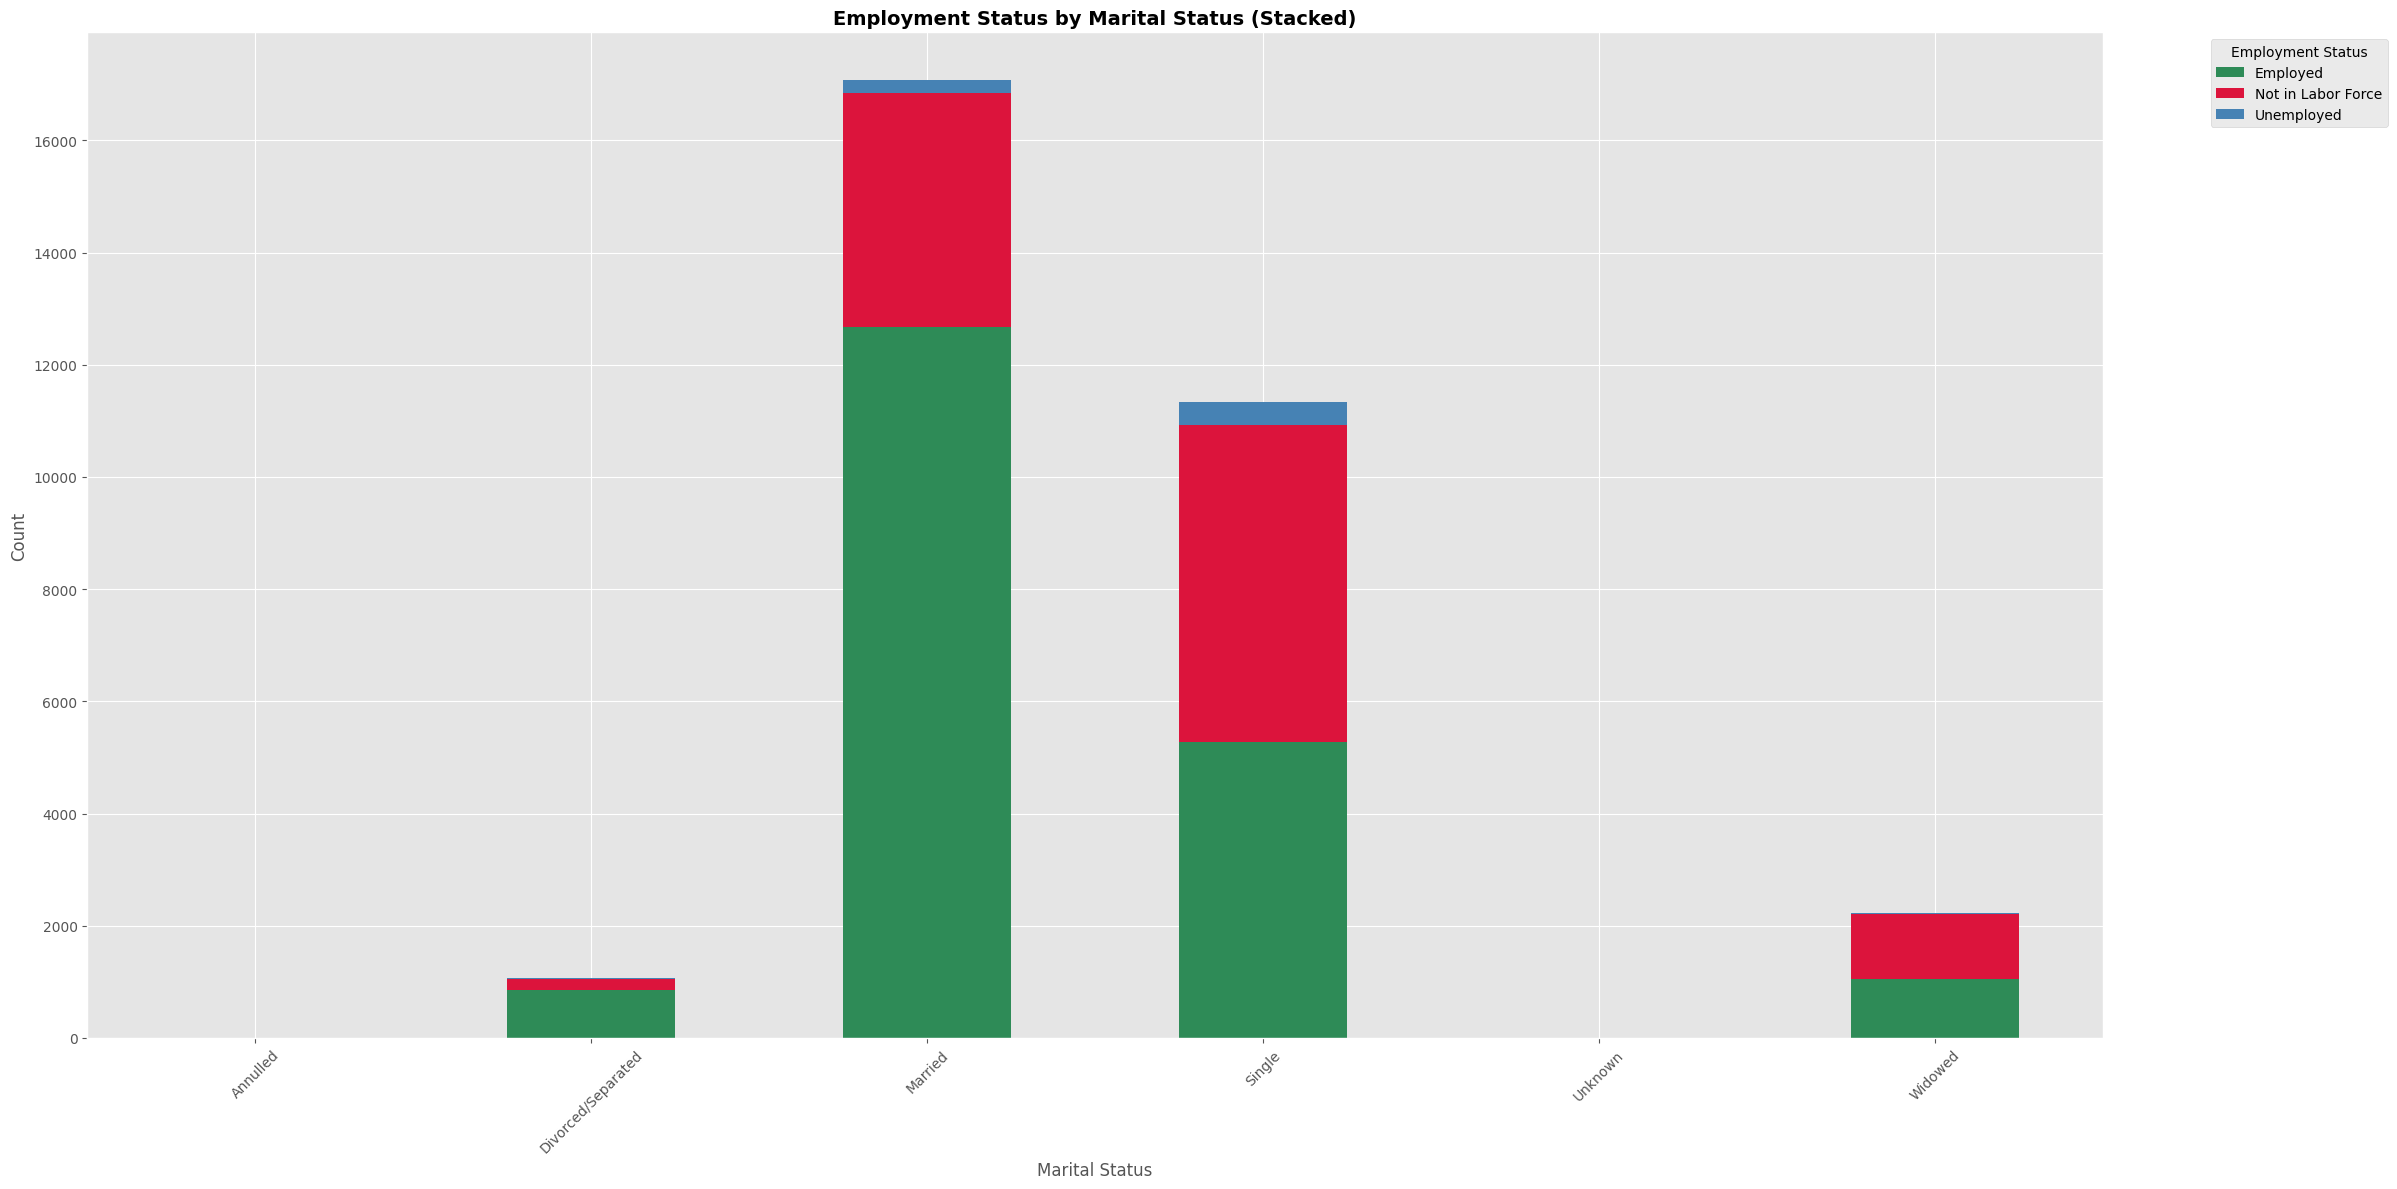

Cross-tabulation of Marital Status vs Employment Status:
Employment_Status_Label  Employed  Not in Labor Force  Unemployed
Marital_Status_Label                                             
Annulled                        3                   2           0
Divorced/Separated            862                 181          32
Married                     12672                4178         222
Single                       5266                5664         399
Unknown                         2                   1           0
Widowed                      1043                1171          17


In [23]:
crosstab.plot(kind='bar', stacked=True, figsize=(24, 12), color=['#2E8B57', '#DC143C', '#4682B4'])
plt.title('Employment Status by Marital Status (Stacked)', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("Cross-tabulation of Marital Status vs Employment Status:")
print(crosstab)

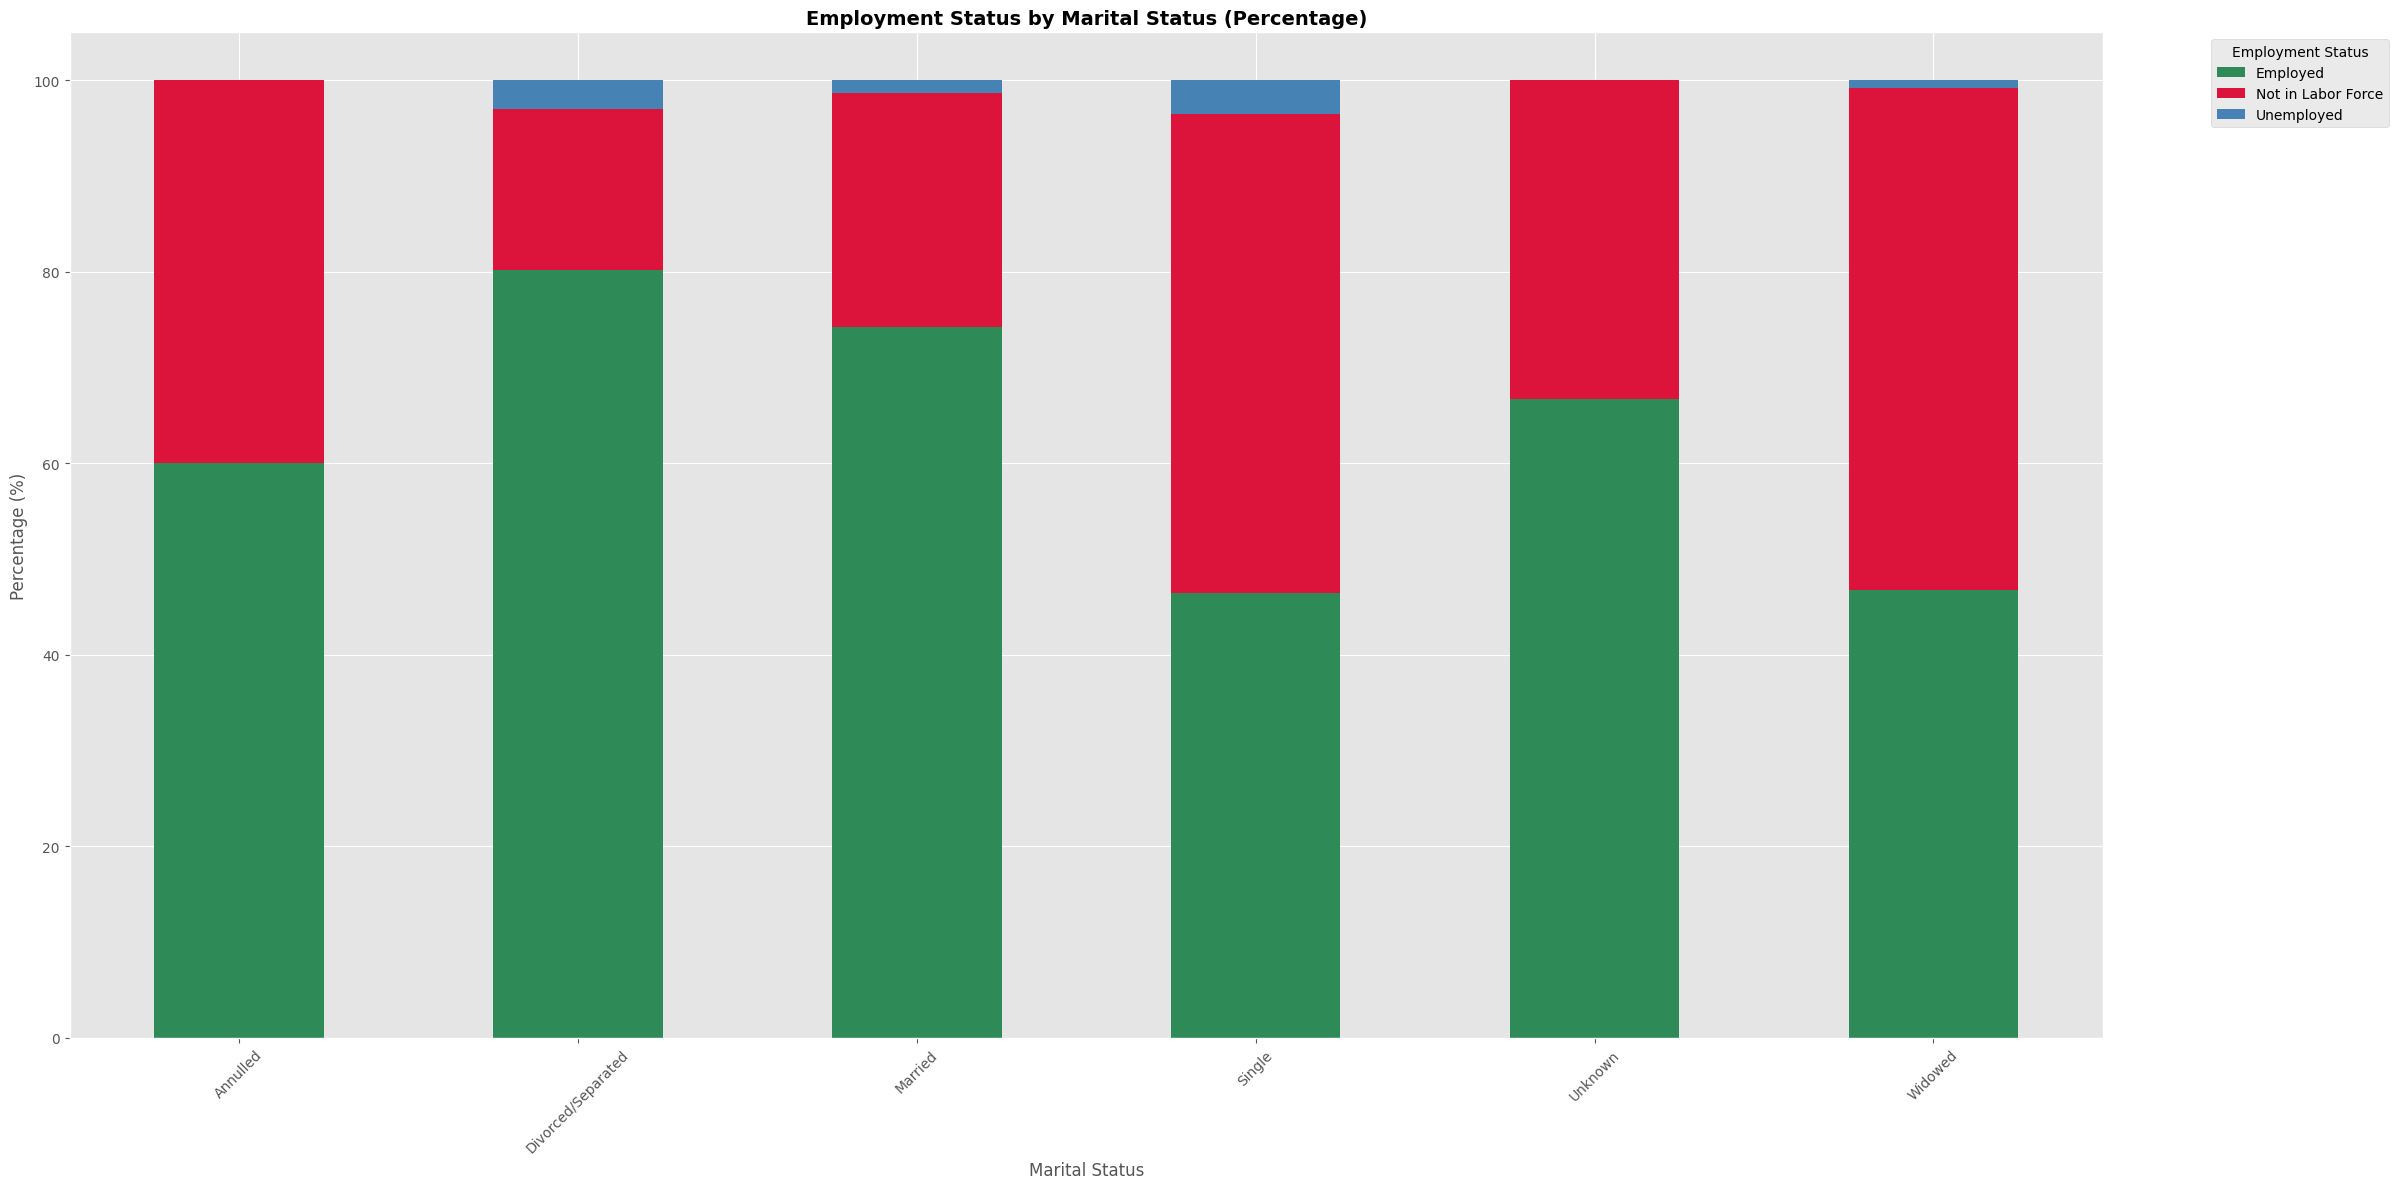


Percentages by Marital Status:
Employment_Status_Label  Employed  Not in Labor Force  Unemployed
Marital_Status_Label                                             
Annulled                    60.00               40.00        0.00
Divorced/Separated          80.19               16.84        2.98
Married                     74.23               24.47        1.30
Single                      46.48               50.00        3.52
Unknown                     66.67               33.33        0.00
Widowed                     46.75               52.49        0.76


In [24]:
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
crosstab_pct.plot(kind='bar', stacked=True, figsize=(24, 12), color=['#2E8B57', '#DC143C', '#4682B4'])
plt.title('Employment Status by Marital Status (Percentage)', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nPercentages by Marital Status:")
print((crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(2))

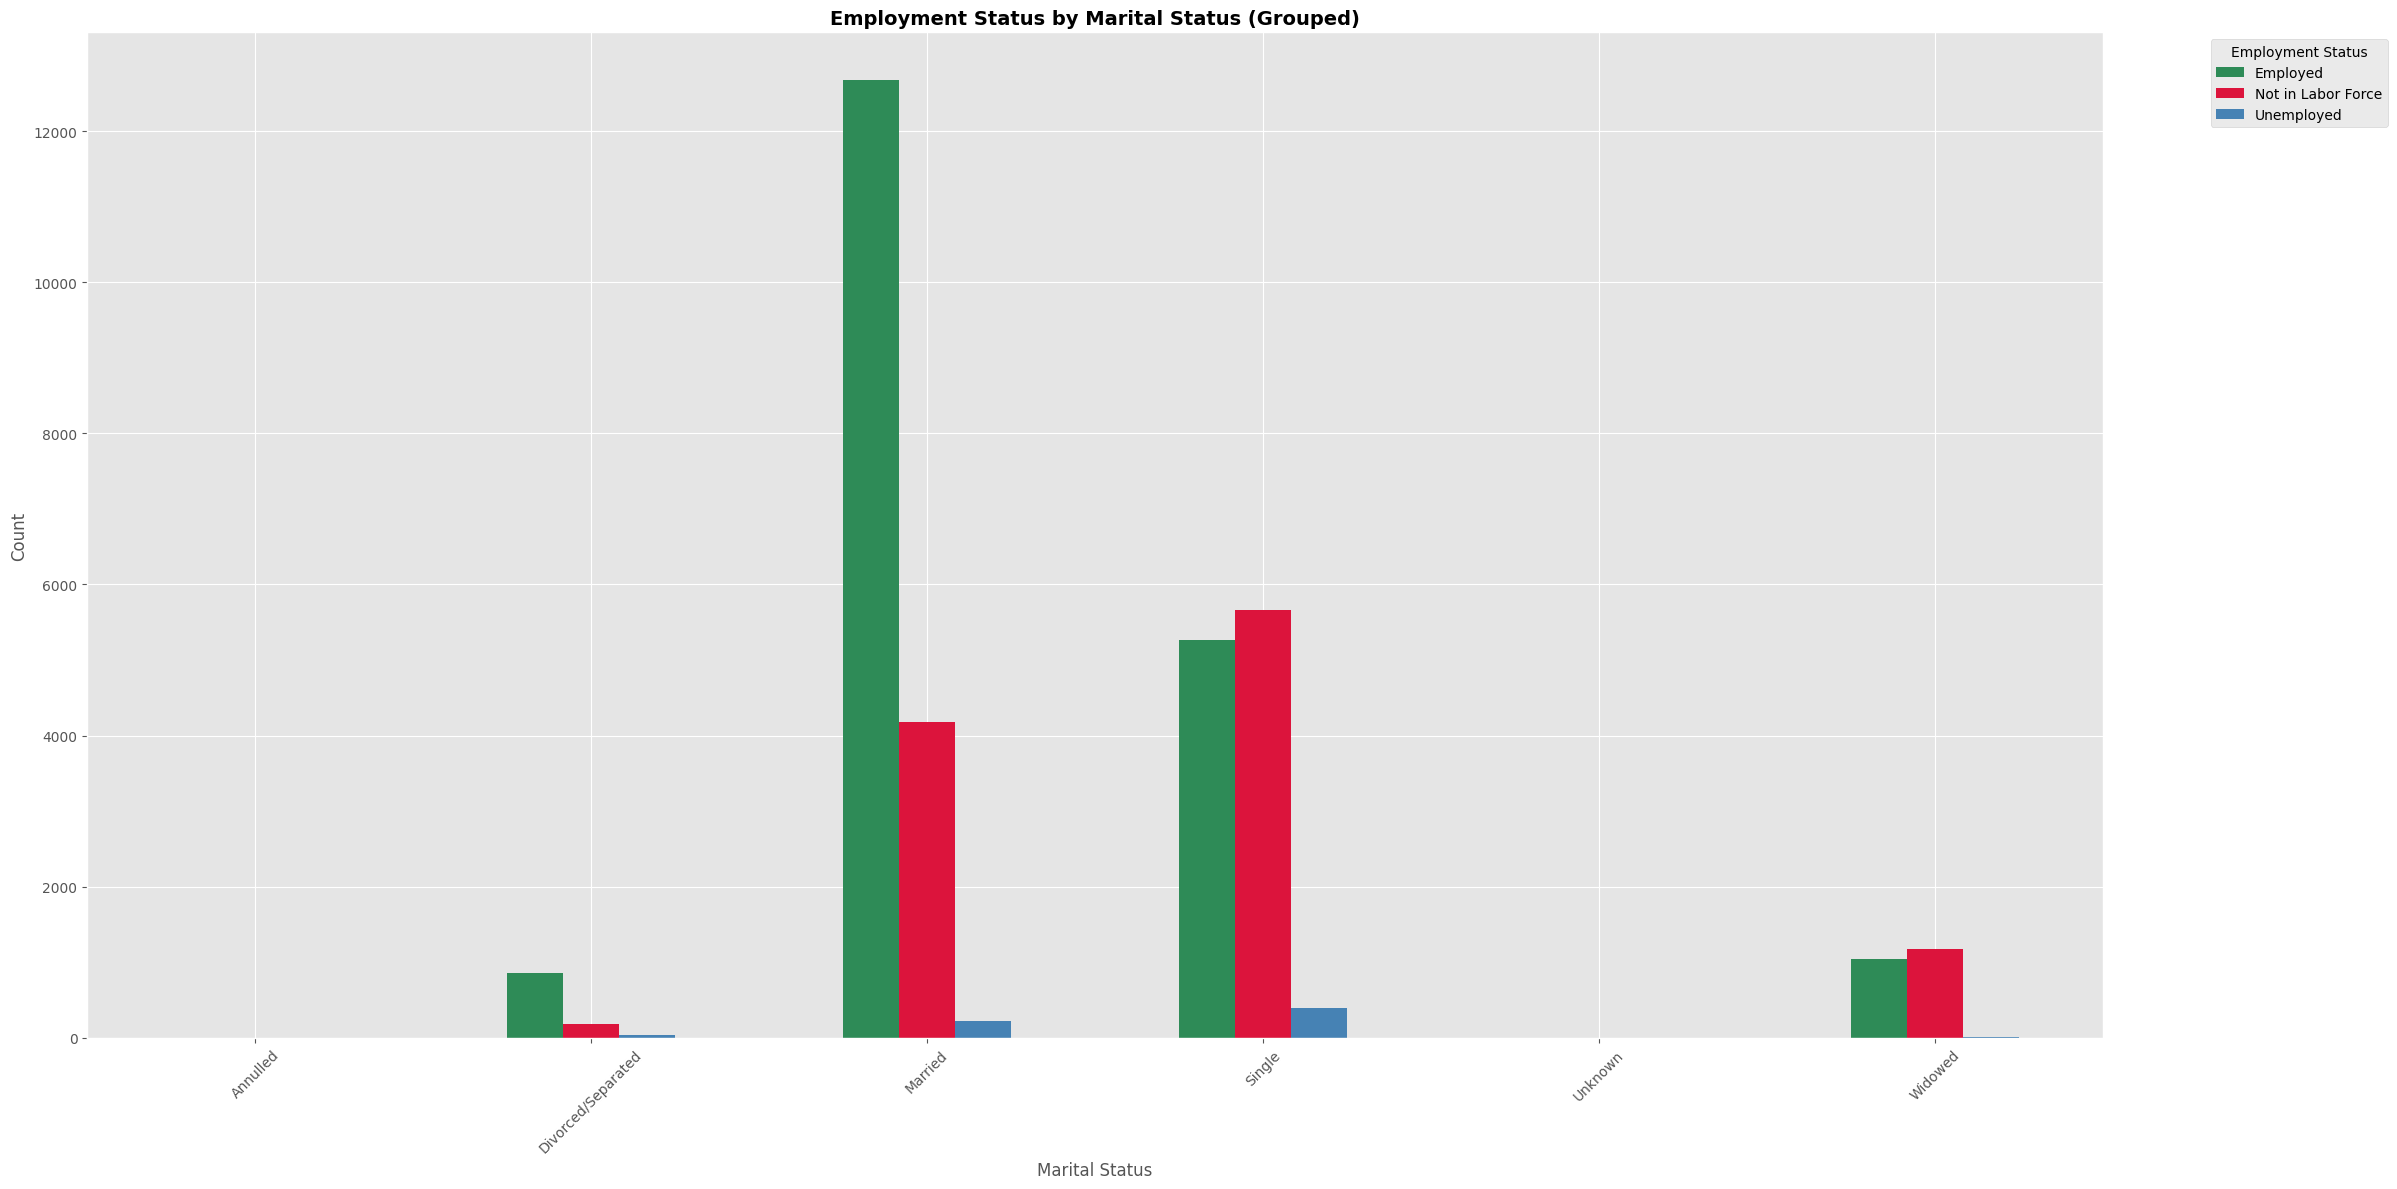

In [25]:
crosstab.plot(kind='bar', figsize=(24, 12), color=['#2E8B57', '#DC143C', '#4682B4'])
plt.title('Employment Status by Marital Status (Grouped)', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
df_marriage_employment['Sex'] = df_marriage_employment['PUFC04_SEX'].map({1: 'Male', 2: 'Female'})
df_marriage_employment = df_marriage_employment.dropna(
    subset=['Marital_Status_Label', 'Employment_Status_Label', 'Sex']
)

colors = {'Male': 'skyblue', 'Female': 'pink'}

crosstab = pd.crosstab(
    [df_marriage_employment['Employment_Status_Label'], df_marriage_employment['Marital_Status_Label']],
    df_marriage_employment['Sex']
)

crosstab = crosstab.reindex(index=pd.MultiIndex.from_product(
    [employment_status_map.values(), marital_status_map.values()],
    names=['Employment Status', 'Marital Status']
), fill_value=0)


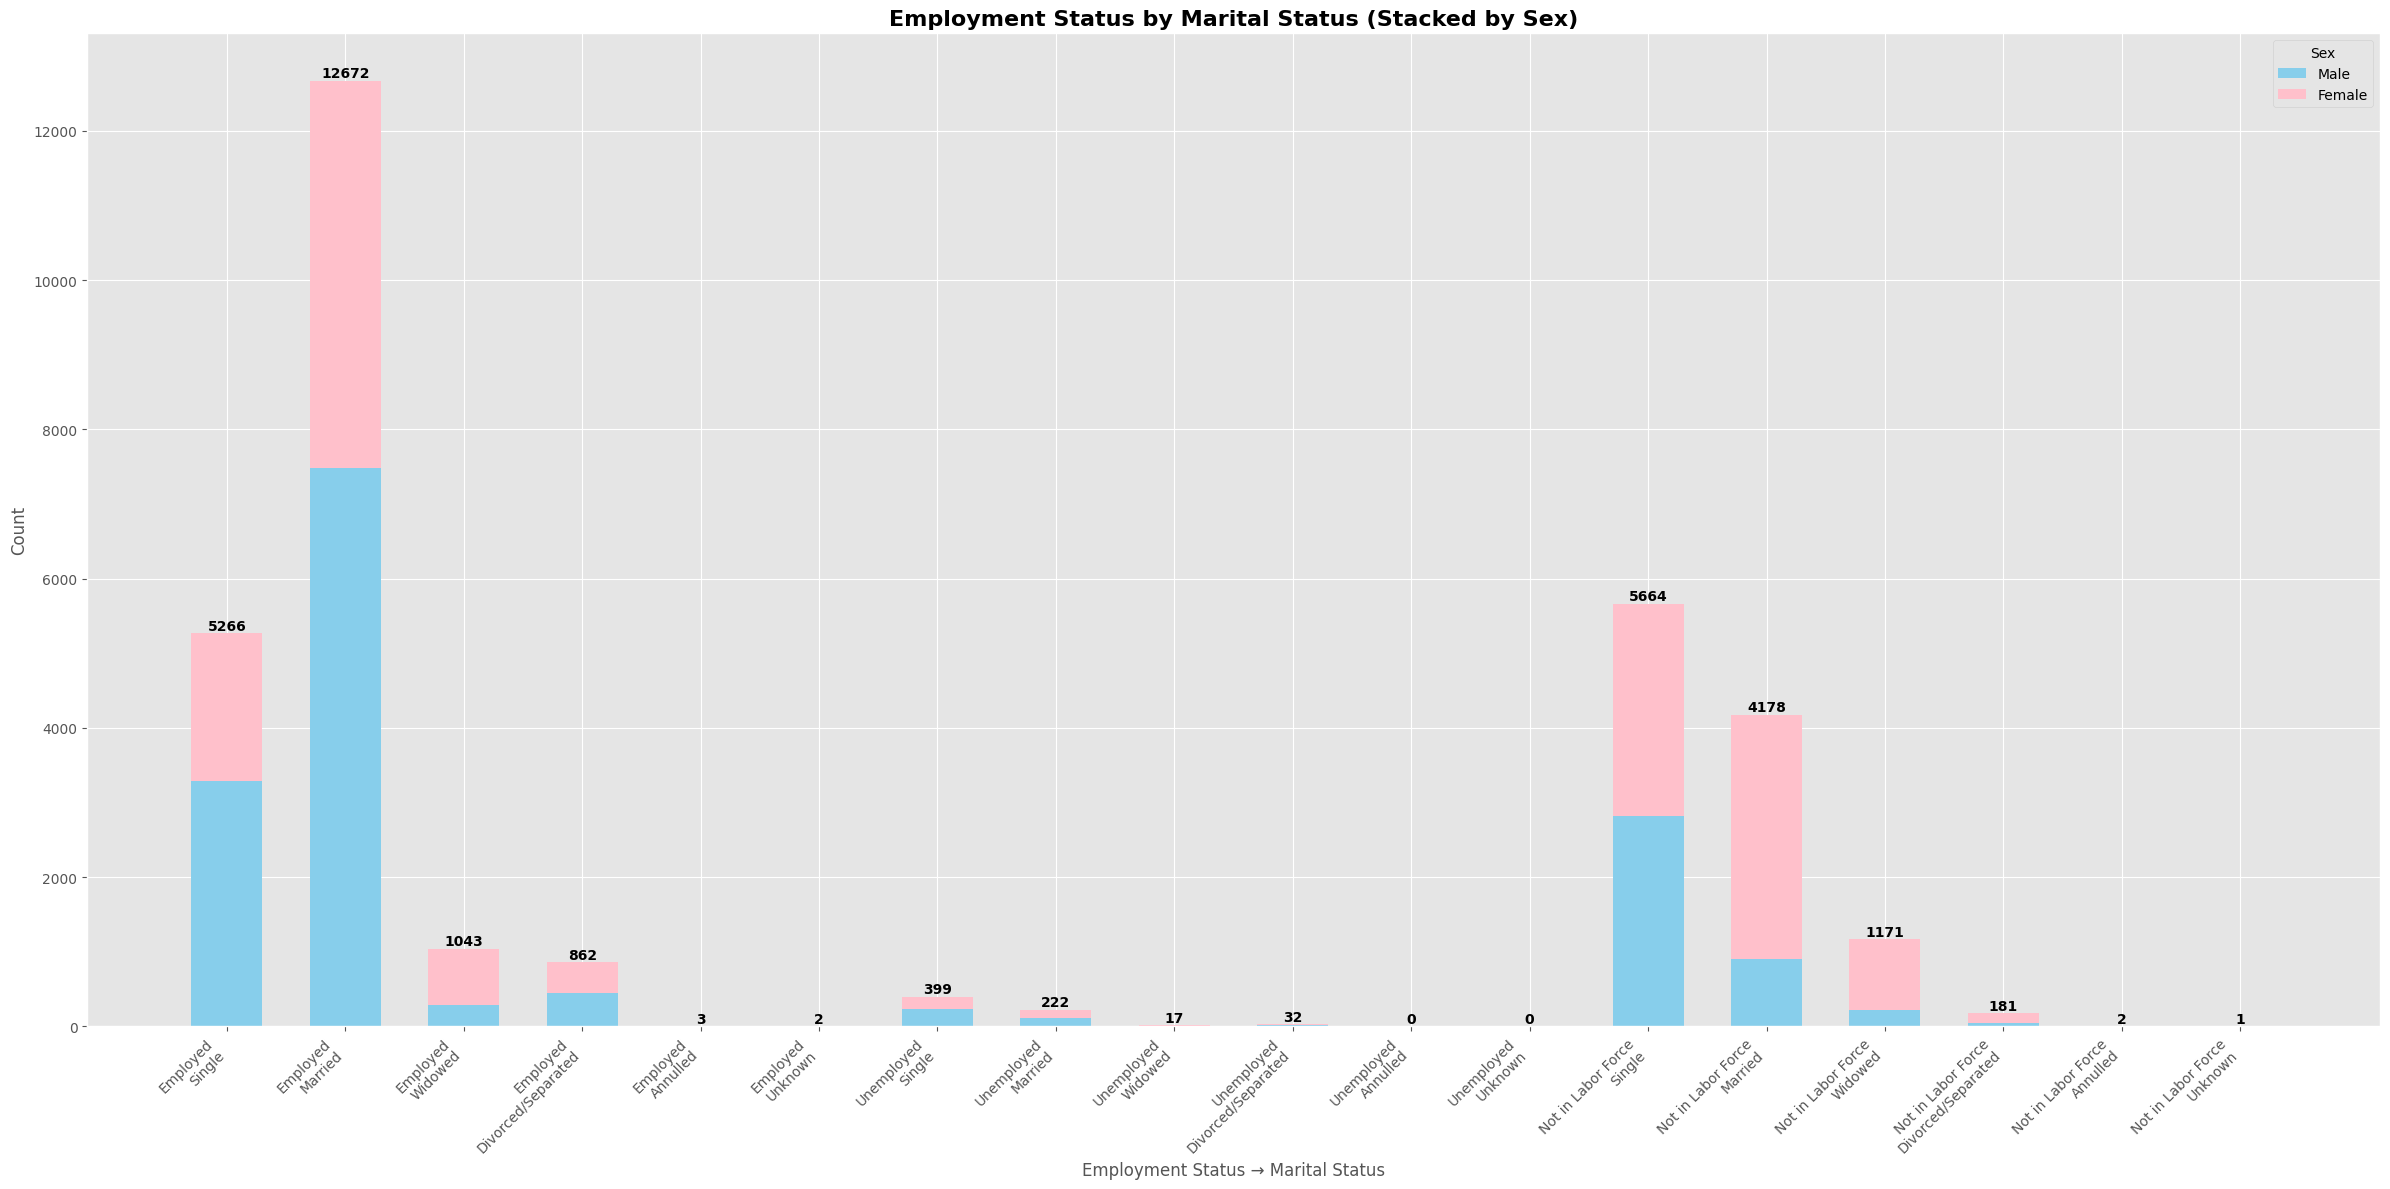

In [27]:
fig, ax = plt.subplots(figsize=(24, 12))

x = np.arange(len(crosstab))
bar_width = 0.6

ax.bar(x, crosstab['Male'], width=bar_width, label='Male', color=colors['Male'])

ax.bar(x, crosstab['Female'], width=bar_width, bottom=crosstab['Male'], label='Female', color=colors['Female'])

#add total counts on top para kita yung parang empty bars
totals = crosstab['Male'] + crosstab['Female']
for i, total in enumerate(totals):
    ax.text(x[i], total + 5, str(total), ha='center', va='bottom', fontsize=10, fontweight='bold')

labels = [f"{e}\n{m}" for e, m in crosstab.index]
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.set_title('Employment Status by Marital Status (Stacked by Sex)', fontsize=16, fontweight='bold')
ax.set_xlabel('Employment Status → Marital Status')
ax.set_ylabel('Count')
ax.legend(title='Sex')
plt.tight_layout()
plt.show()

In [28]:
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Total records analyzed: {len(df_marriage_employment)}")
print(f"Marital status categories: {df_marriage_employment['Marital_Status_Label'].nunique()}")
print(f"Employment status categories: {df_marriage_employment['Employment_Status_Label'].nunique()}")

print("\nEmployment rate by marital status:")
employment_rate = df_marriage_employment.groupby('Marital_Status_Label')['Employment_Status_Label'].apply(
    lambda x: (x == 'Employed').sum() / len(x) * 100
).round(2)
print(employment_rate)


SUMMARY STATISTICS
Total records analyzed: 31715
Marital status categories: 6
Employment status categories: 3

Employment rate by marital status:
Marital_Status_Label
Annulled              60.00
Divorced/Separated    80.19
Married               74.23
Single                46.48
Unknown               66.67
Widowed               46.75
Name: Employment_Status_Label, dtype: float64


#### 📉 Summary of Insights:
- Employment tends to increase with age until mid-30s, then plateaus or drops.
- Men are more likely to be employed than women in this dataset.
- Married individuals show higher employment, possibly due to financial responsibility.
- Regional disparities exist, with NCR showing higher employment than other regions.

- The "Null" status correctly identifies a population group that is largely too young to be part of the workforce.
- The "Employed" group is concentrated in the prime working ages, as expected.
- The "Unemployed" are younger individuals likely at the start of their careers and actively seeking employment.
- The "Temporarily Unemployed" category is the most varied in terms of age. The skewed distribution points to a mix of younger individuals in precarious work situations and a smaller number of older, more experienced workers who are temporarily without work. This group warrants further investigation to understand the different sub-populations within it.

### BONUS:

Let's view this with a different lens; compare the occupations of the Filipino population with their ages.

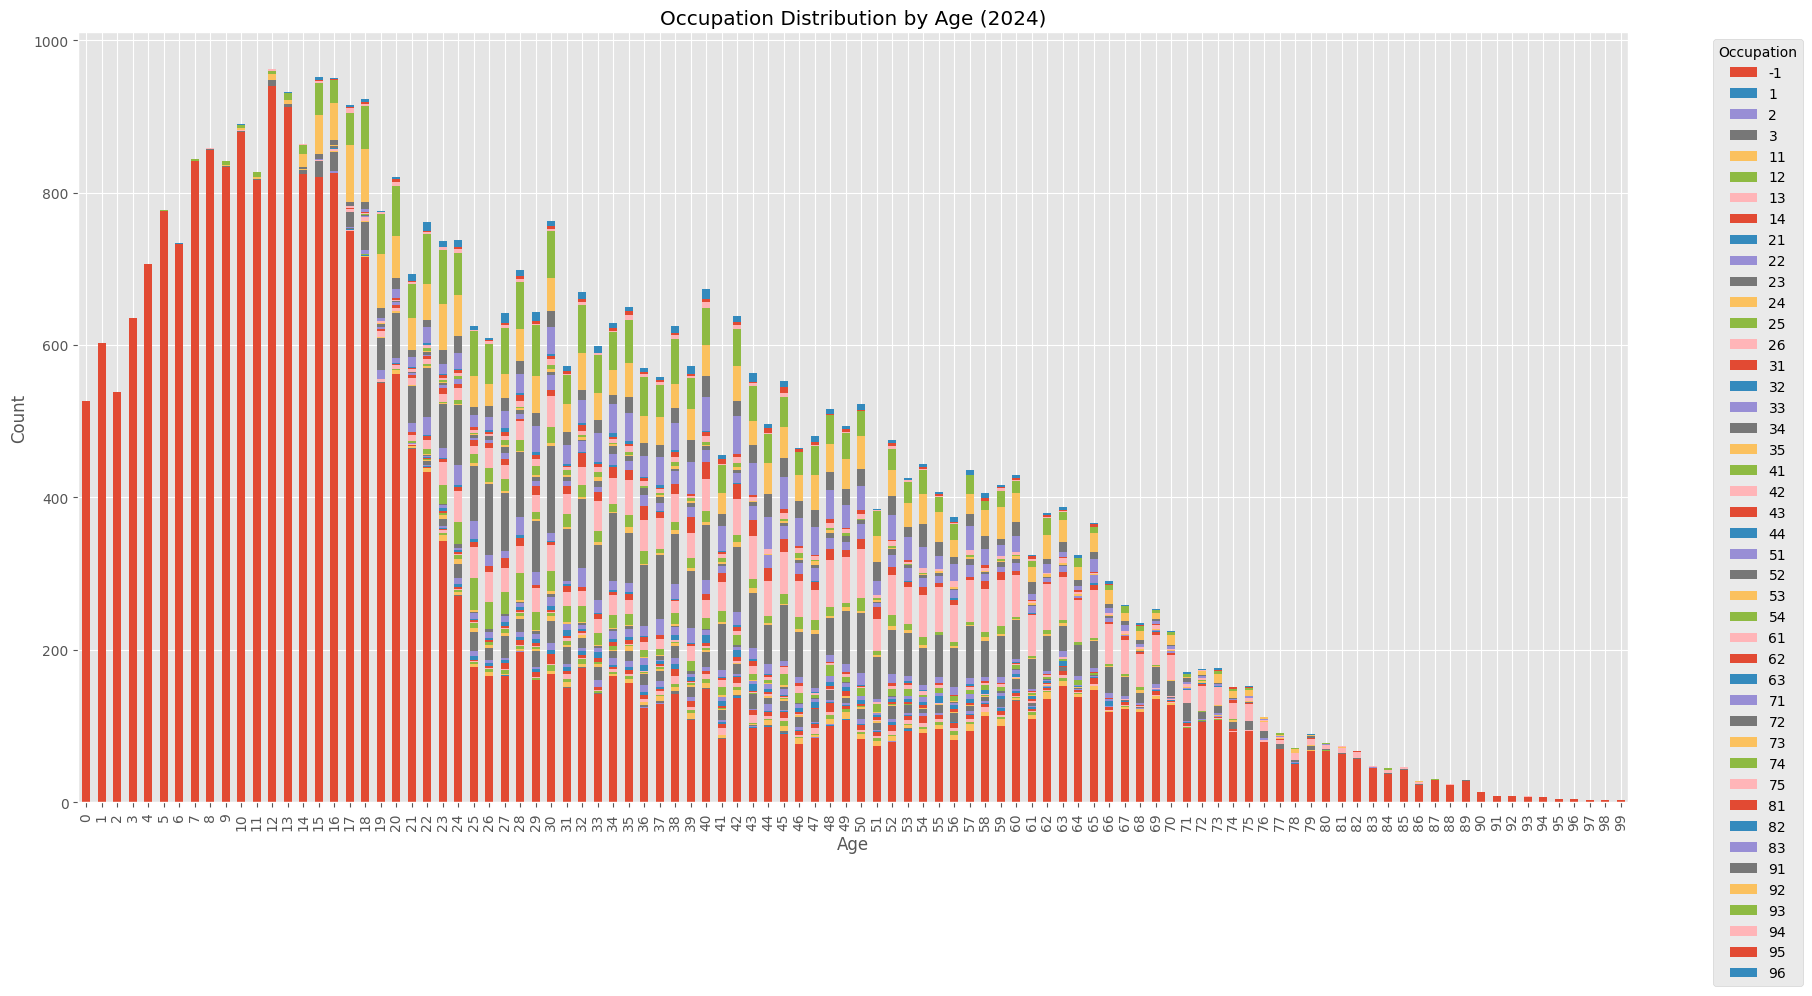

In [29]:
occupation_sex = lfs_data.groupby(['PUFC05_AGE', 'PUFC13_PROCC']).size().unstack(fill_value=0)
occupation_sex.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Occupation Distribution by Age (2024)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Just for the sake of better visibility, let us create a mask and visualize the same histogram but this time without all the whitespace values (all the people who do not have jobs).

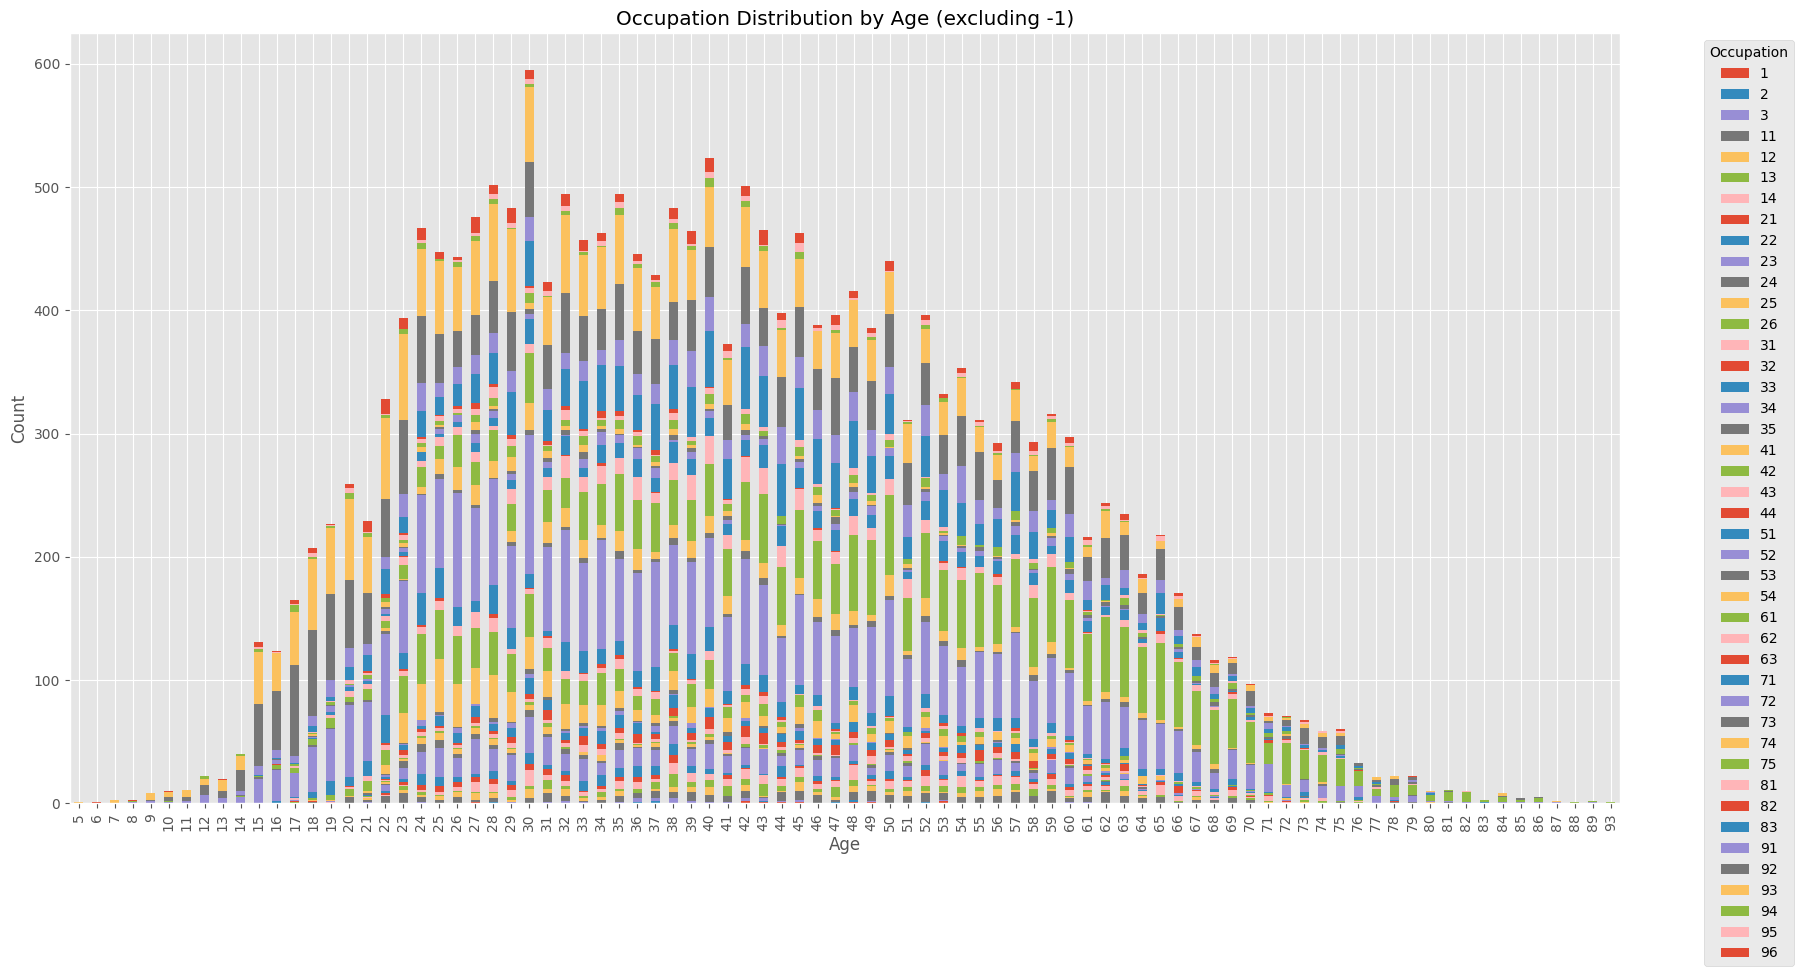

In [30]:
mask = (lfs_data['PUFC13_PROCC'] != -1) & (lfs_data['PUFC13_PROCC'] != '  ')

lfs_data_filtered = lfs_data[mask].copy()

occupation_sex = lfs_data_filtered.groupby(['PUFC05_AGE', 'PUFC13_PROCC']).size().unstack(fill_value=0)
occupation_sex.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Occupation Distribution by Age (excluding -1)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
print(f"Minimum Age: {lfs_data_filtered['PUFC05_AGE'].min(numeric_only=True)}")
print(f"Maximum Age: {lfs_data_filtered['PUFC05_AGE'].max(numeric_only=True)}")

Minimum Age: 5
Maximum Age: 93


This histogram shows a shocking truth where kids as early as 5 years old are already given jobs and occupations; majority of which are in the agricultural sector. 

That's honestly just a sad reality. 

# ☹️

___

#### Section 2.3.2 - Education & Employability

##### Research Sub-Question: 
* Does the highest grade completed (educational attainment) significantly affect a person's employability?

##### Why This Matters: 
* Educational attainment is widely regarded as a key driver of employability. It shapes skill level, job qualifications, and access to formal employment sectors. Investigating its impact helps assess whether the labor market rewards education fairly and can inform investments in educational reform and workforce development.

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.3 - Previous Work Experience

##### Research Sub-Question: 
* How does prior employment history (e.g., previous job, time since last worked) relate to current employability?

##### Why This Matters: 
* Prior work experience is often used by employers as a signal of readiness, skill, and professionalism. Analyzing how previous employment history affects current employability helps uncover whether gaps in work history or specific career trajectories serve as barriers or advantages in the job market.

In [32]:
# code

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.4 - Job-Seeking Behavior

##### Research Sub-Question: 
* Do individuals actively looking for work or willing to work longer hours have a higher probability of being employed?

##### Why This Matters: 
* Job-seeking activity reflects motivation and availability for work—two essential components of employability. Individuals who are actively seeking work or are open to additional hours may face structural barriers that are not immediately visible. This analysis provides insight into underemployment and unmet labor demand.

In [33]:
# code here

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.5 - Occupation & Industry

##### Research Sub-Question: 
* Which occupation groups and industries are most associated with higher employment rates?

##### Why This Matters: 
* Different occupation and industry sectors vary in terms of growth, automation risk, formality, and wage levels. Identifying which job categories are most associated with higher employment rates can guide career planning, policy support, and skills training programs aligned with market demand.

In [34]:
# code

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.6 - Work Hours & Nature of Work

##### Research Sub-Question: 
* Are people working more hours or in specific employment classes (e.g., self-employed vs. private sector) more likely to stay employed?

##### Why This Matters: 
* The structure and intensity of a person’s work—measured in hours and employment class—reflect both the quality and stability of their employment. Exploring how these variables relate to employability helps assess the sustainability of current labor conditions and highlight potential exploitation or overwork.

In [35]:
# code

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.7 - Geographical Differences

##### Research Sub-Question: 
* Are there regional disparities in employability across the Philippines?

##### Why This Matters: 
* Employment opportunities in the Philippines are unevenly distributed due to differences in economic development, infrastructure, and industry presence across regions. Understanding regional disparities enables more equitable policy development and better targeting of employment programs at the local level.

In [36]:
# code

#### 📉 Summary of Insights:
- 

With the goal being to identify the factors that affect a person's employability, this MCO is essentially doing a predictive explanatory analysis—with employment status (e.g., employed vs. unemployed) as its dependent variable, and all other variables as potential independent variables.


TODO:

Remove Non-Individual-Level Variables
Exclude survey metadata and household-level identifiers:
PUFHHNUM, PUFHHSIZE, PUFPSU, PUFRPL, PUFPWGTPRV, etc.

remove section 6
PUFPWGTPRV	Final Weight Based on Projection
PUFSVYMO	Survey Month
PUFSVYYR	Survey Year
PUFPSU	PSU Number
PUFRPL	Replicate

Drop or Aggregate Redundant Columns
Example:
PUFC09_WORK vs. PUFC10_JOB: Choose one or encode a combined feature.
PUFC29_YEAR and PUFC29_MONTH

Normalize Numerical Variables
PUFC05_AGE
PUFC17_PNWHRS
PUFC18_PHOURS
PUFC23_THOURS


Feature Engineering: Build Predictors
PUFC07_GRADE

PUFREG

Work History
Combine:
PUFC28_PREVJOB
PUFC29_YEAR + PUFC29_MONTH → Time since last job

🕰 Work Effort
Total hours worked: PUFC18_PHOURS, PUFC23_THOURS
Overworked indicator: PUFC24_WWM48H

🙋‍♂️ Labor Motivation
PUFC19_PWMORE, PUFC20_PLADDW, PUFC25_LOOKW, PUFC27_AVAIL: indicate willingness to work



Model and Analyze
You can now:
Run Logistic Regression (for interpretability)
Or use Random Forest, XGBoost, or Neural Nets for accuracy
Use feature importance to discover key predictors of employability

---

### Phase 2: Statistical Inference, Data Mining, Key Insights and Conclusions

> Delivarables:
> 
> 1. A Jupyter Notebook containing all the data processing you did in the project. The Notebook should include Markdown
cells explaining each process, and highlighting the insights and conclusions. The Notebook should be structured in a
way that (1) is easy to understand, and (2) can be run sequentially to reproduce all outputs in your work.
> 
> 2. A poster that communicates all key findings and insights of your work. The poster should be intuitive to understand,
and intended for a general audience.

## 💎 Section 3 - Data Mining

## 🧮 Section 4 - Statistical Inference

## 💡 Section 5 - Insights and Conclusions

Your must ensure that you will go through all of these minimum requirement tasks in your project:
1. identify a general research question that you aim to answer in your data narrative
2. perform exploratory data analysis, covering at least 3 EDA questions, to get a good understanding of the data
3. conduct at least 3 statistical tests to establish three sound conclusions from the data
4. apply at least one of the following techniques: (1) rule mining, (2) clustering, or (3) collaborative filtering to discover
meaningful insights from the data (you may also choose to apply any of the variants of the above approaches)

## 🖋️ Section 6 - References


* *Median age of the labor force, by sex, race, and ethnicity*. (2024, August 29). Bureau of Labor Statistics. https://www.bls.gov/emp/tables/median-age-labor-force.htm